# Start Q1: Structural Problems

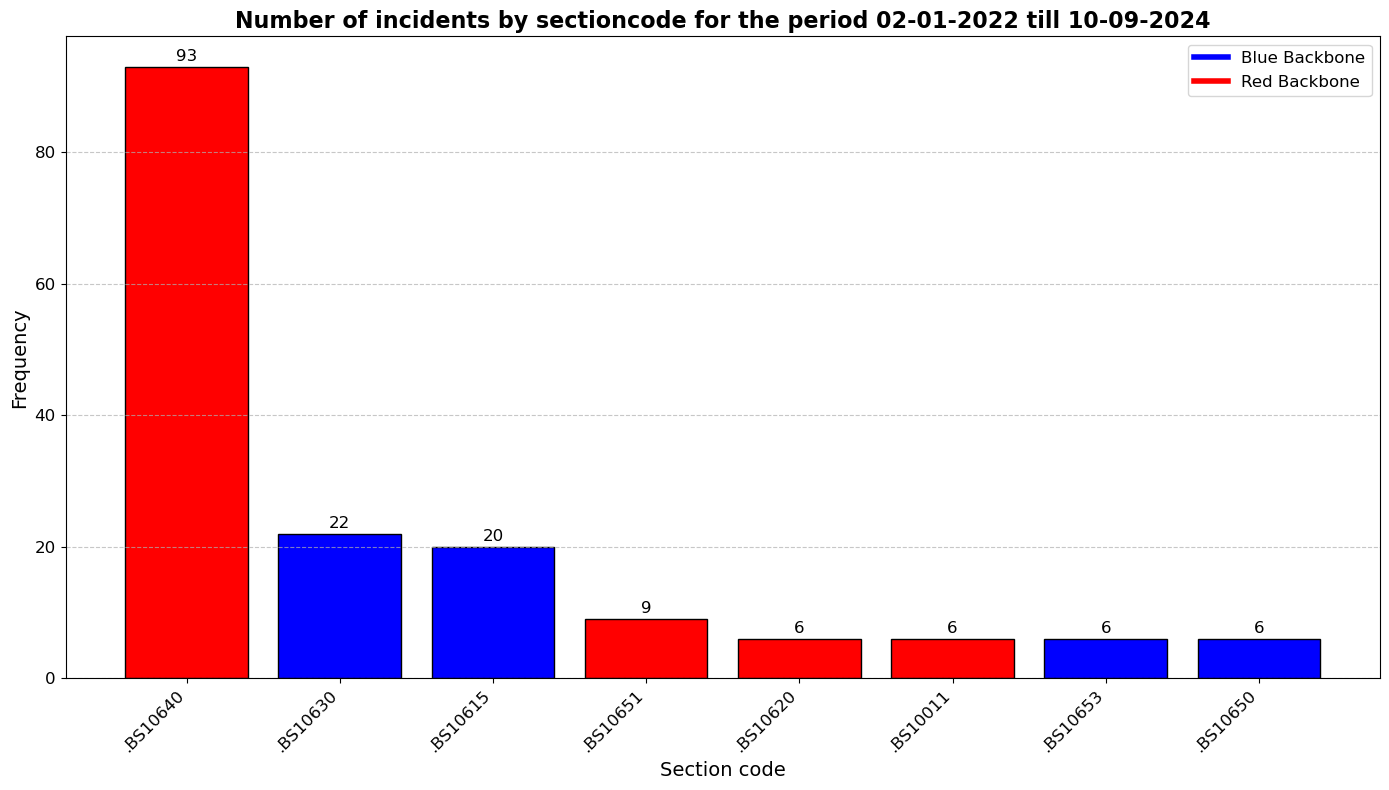

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r'C:\Users\miche\Downloads\Backbone incidenten.xlsx'  # Update the path if needed
df = pd.read_excel(file_path)

# Extract the 'Code' column
code_column = df['Code']

# Get the 20 most frequent values
top_20_frequent = code_column.value_counts().head(8)

# Define blue and red code groups
blue_codes = ['.BS10615', '.BS10630', '.BS10650', '.BS10653', '.BS10654', '.BS10655', '.BS10610']
red_codes = ['.BS10640', '.BS10651', '.BS10620', '.BS10011']

# Plot a bar chart for the top 20 frequent values
plt.figure(figsize=(14, 8))

# Assign colors based on code
bar_colors = ['blue' if code in blue_codes else 'red' if code in red_codes else 'skyblue' for code in top_20_frequent.index]

bars = plt.bar(top_20_frequent.index.astype(str), top_20_frequent.values, color=bar_colors, edgecolor='black')

# Add title and labels
plt.title('Number of incidents by sectioncode for the period 02-01-2022 till 10-09-2024', fontsize=16, fontweight='bold')
plt.xlabel('Section code', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display frequency values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=12)

# Add legend
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Blue Backbone')
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Red Backbone')
plt.legend(handles=[blue_patch, red_patch], fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\miche\AppData\Local\Temp\ipykernel_14712\3676883642.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Color'] = df_filtered['Code'].map(color_map)


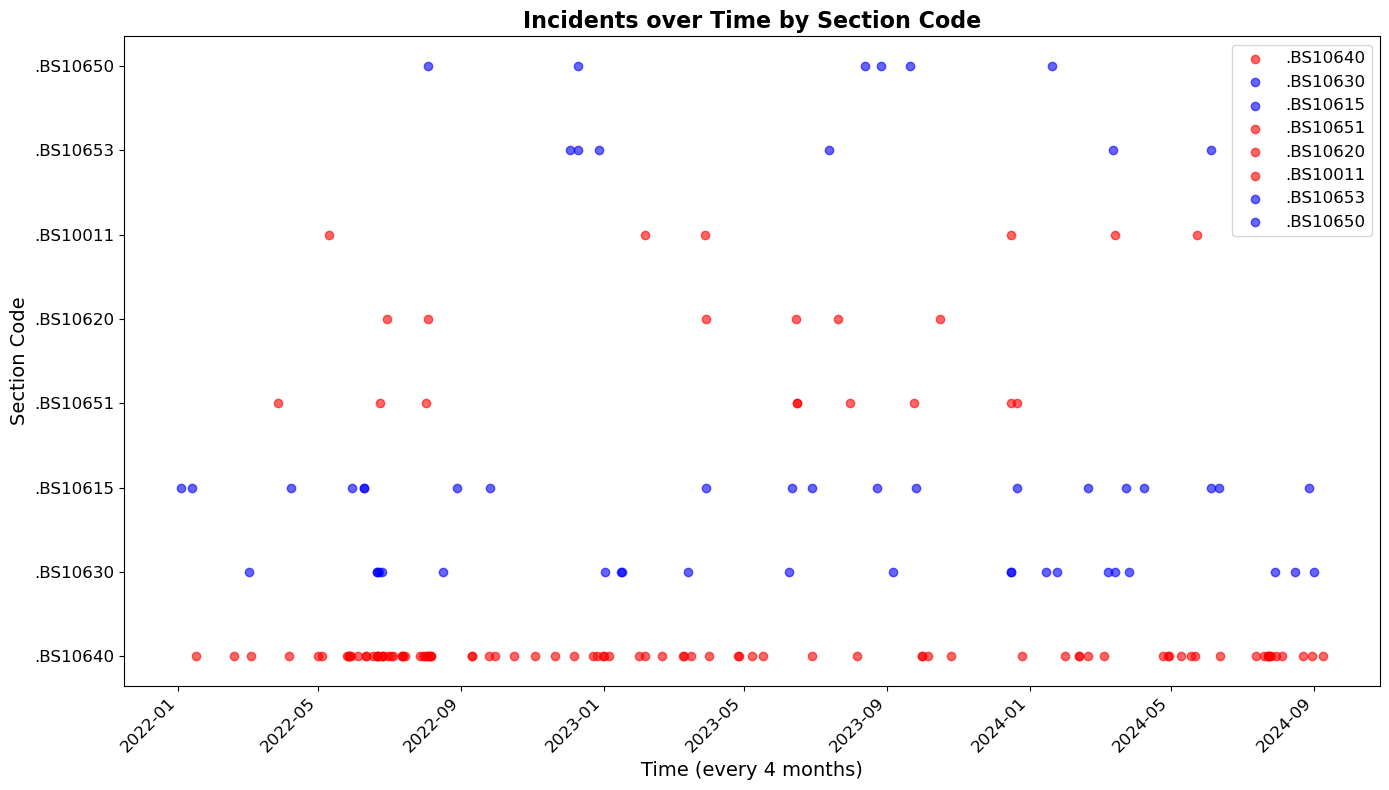

In [12]:
# Load the Excel file
file_path = r'C:\Users\miche\Downloads\Backbone incidenten.xlsx'  # Update the path if needed
df = pd.read_excel(file_path)

# Convert 'Function restored' column to datetime and extract date and time
df['Restored_DateTime'] = pd.to_datetime(df['Function Restored'], errors='coerce')

# Extract the 'Code' column
code_column = df['Code']

# Get the 8 most frequent values
top_8_frequent_codes = code_column.value_counts().head(8).index

# Filter the DataFrame to include only the top 8 codes
df_filtered = df[df['Code'].isin(top_8_frequent_codes)]

# Define blue and red code groups
blue_codes = ['.BS10615', '.BS10630', '.BS10650', '.BS10653', '.BS10654', '.BS10655', '.BS10610']
red_codes = ['.BS10640', '.BS10651', '.BS10620', '.BS10011']

# Create a color map based on the section code
color_map = {code: 'blue' if code in blue_codes else 'red' if code in red_codes else 'green' for code in top_8_frequent_codes}

# Assign colors to the filtered DataFrame
df_filtered['Color'] = df_filtered['Code'].map(color_map)

# Plot a scatter plot with time on the x-axis and section code on the y-axis
plt.figure(figsize=(14, 8))

for code in top_8_frequent_codes:
    df_code = df_filtered[df_filtered['Code'] == code]
    plt.scatter(df_code['Restored_DateTime'], df_code['Code'], color=color_map[code], label=code, alpha=0.6)

# Add title and labels
plt.title('Incidents over Time by Section Code', fontsize=16, fontweight='bold')
plt.xlabel('Time (every 4 months)', fontsize=14)
plt.ylabel('Section Code', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Comparison of Total Baggage Flow Accros infeeds for a specific date

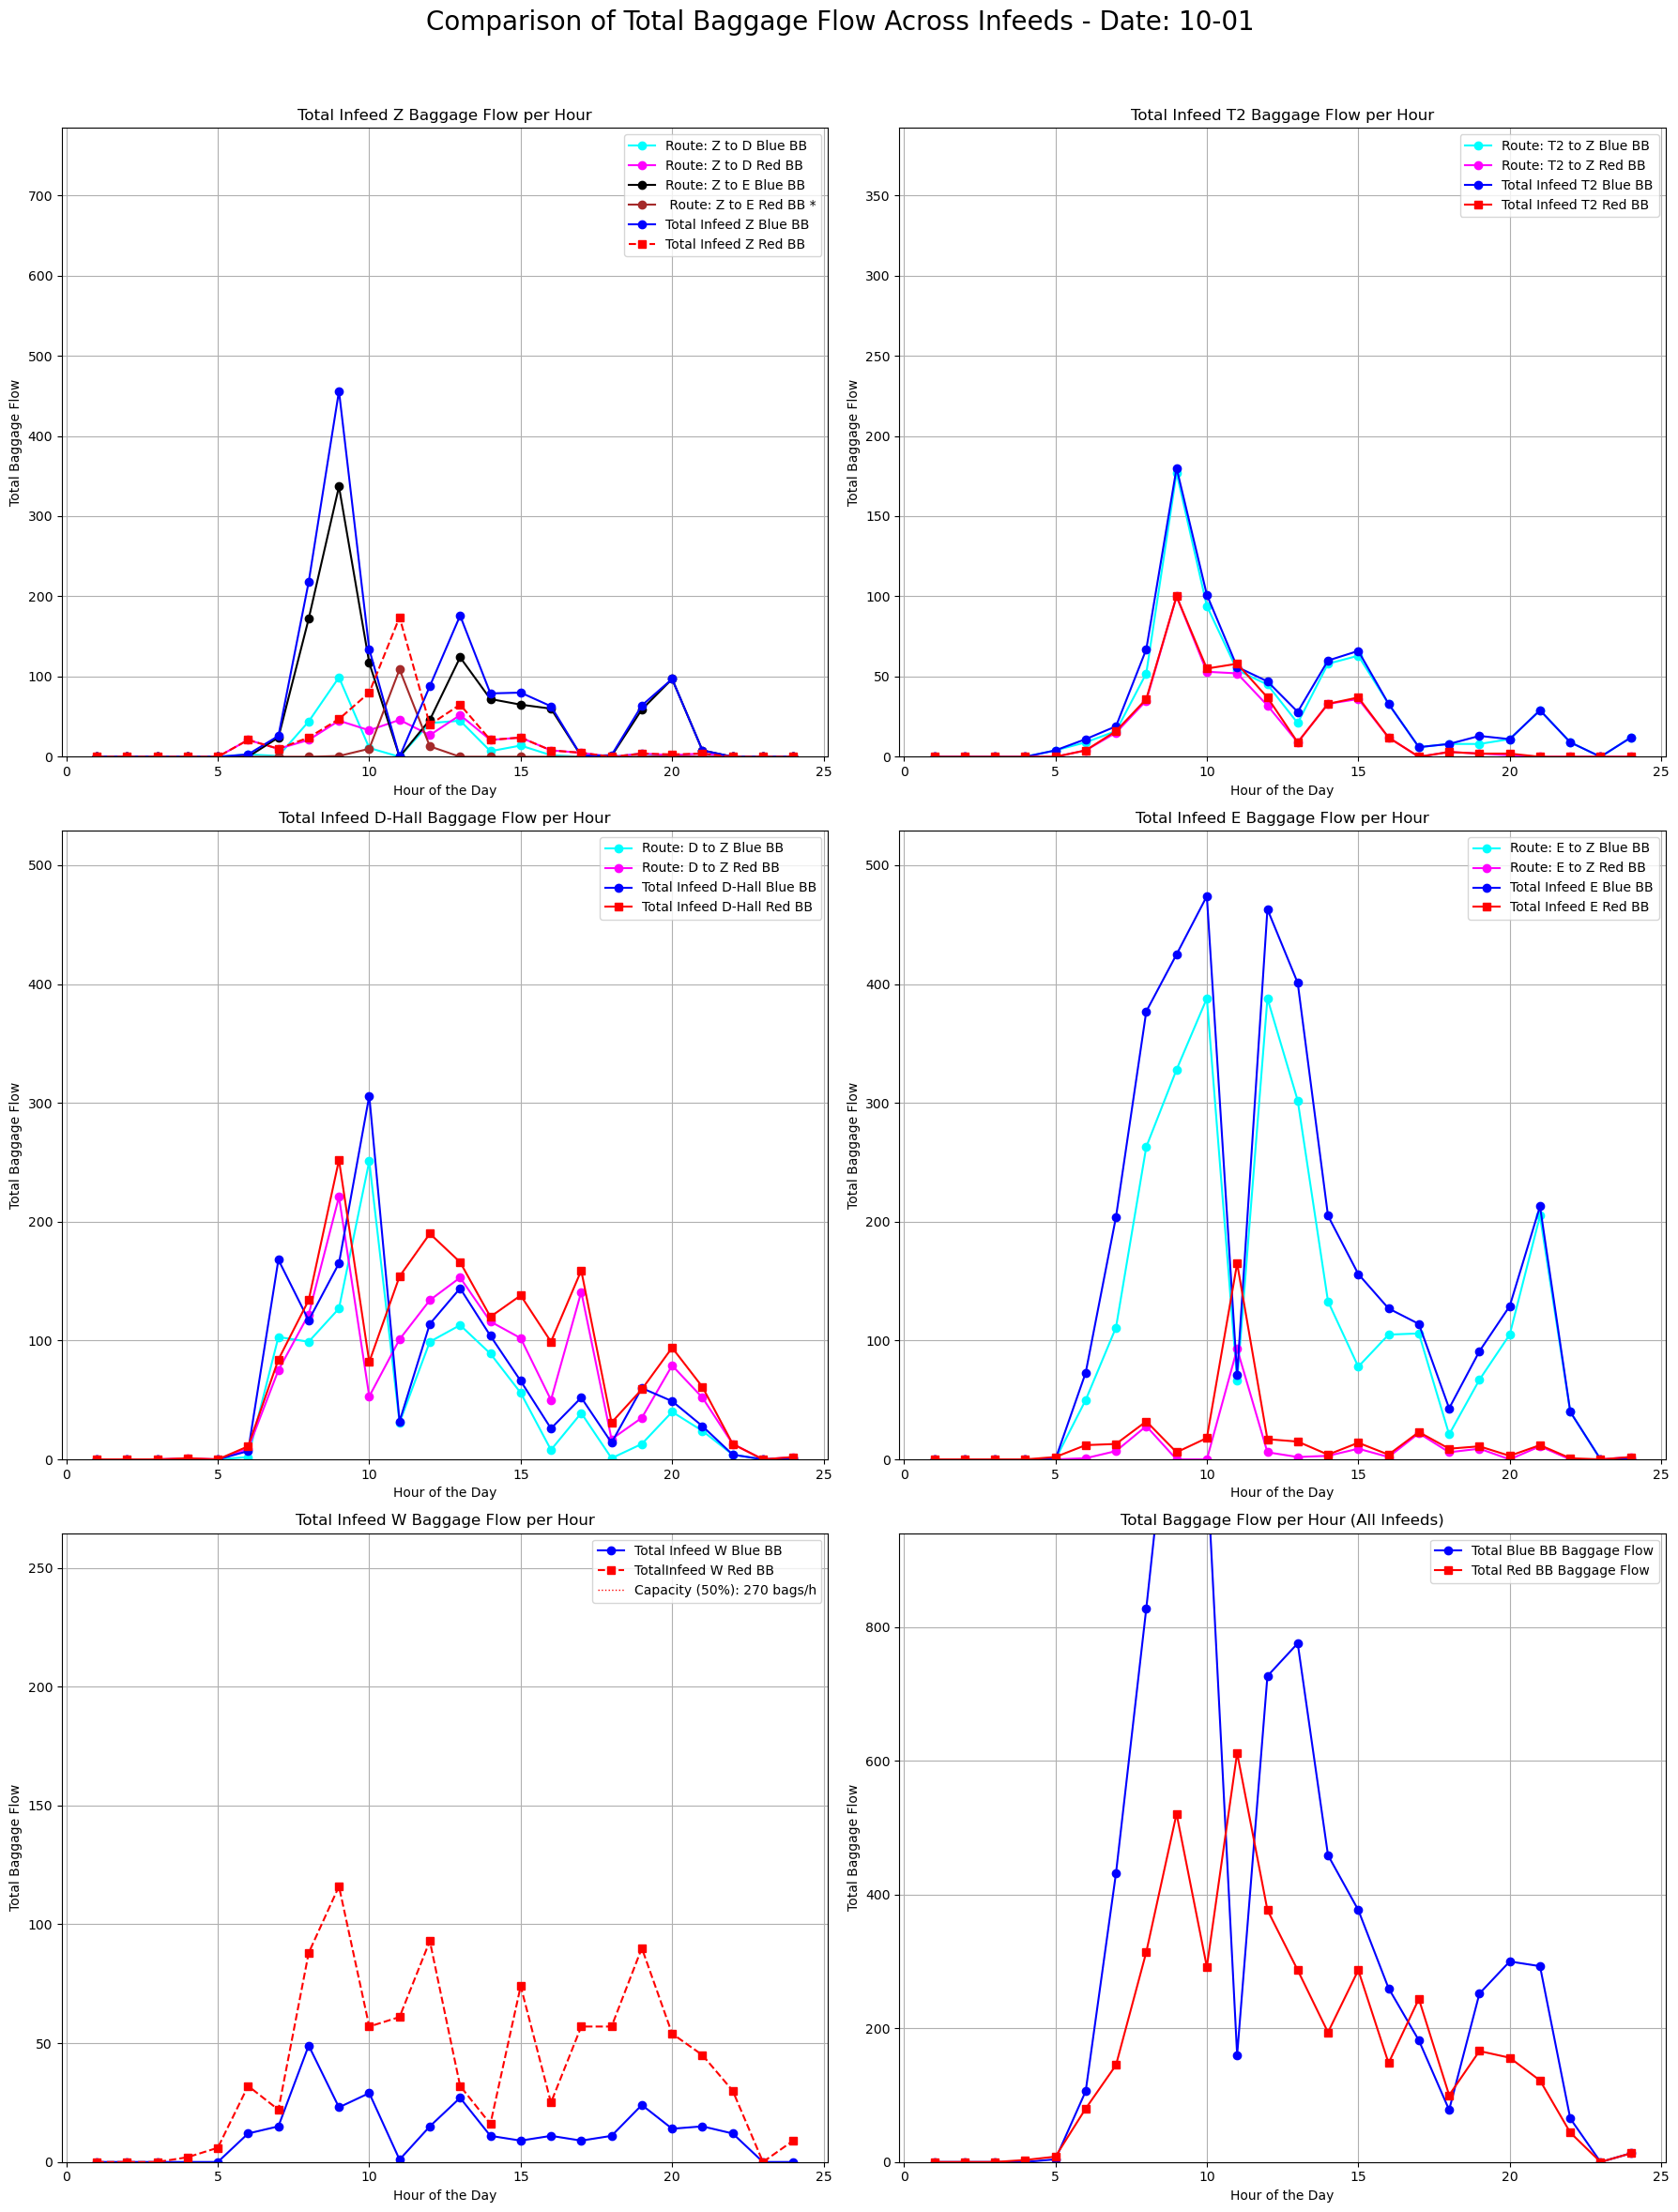

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Correctly assign the file path to the file_path variable
file_path = r"C:\\Users\\miche\\Downloads\\01-06 Load on BB.xlsx"  

# Assign the date (e.g., '01-06') to a variable for the sheet name
date = '10-01'

# Use the date to refer to the corresponding sheet in the Excel file
sheet_name = date  # e.g., '01-06'
df = pd.read_excel(file_path, sheet_name=sheet_name)


#=====================================================================
# Code for infeed E
# Define the column lists for Infeed E Blue BB and Red BB
Infeed_E_Blue_BB_columns = [
    'C via BB (10033) to W',
    'C via BB (10033) to Z',
    'C via BB (10034) to Z',
    'C via BB (10630) to E',
    'C via BB (10630) to D',
    'C via BB (10630) to W',
    'C via BB (10630) to Z',
    'UQE via BB (10630) to D',
    'UQE via BB (10630) to E',
    'UQE via BB (10630) to Z',
    'UQE via BB (10630) to W',
    'UQE via BB (10033) to W',
    'UQE via BB (10033) to Z',
    'UQE via BB (10033) to E',
    'UQE via BB (10034) to W',
    'UQE via BB (10034) to Z',
    'UQE via BB (10009) to D',
    'UQE via BB (10009) to Z',
]

Infeed_E_Red_BB_columns = [
    'UQE via BB (10640) to D', 
    'UQE via BB (10640) to E', 
    'UQE via BB (10640) to Z',
    'UQE via BB (10008) to D', 
    'UQE via BB (10008) to Z', 
    'UQE via BB (10035) to D',
    'UQE via BB (10035) to W', 
    'UQE via BB (10035) to Z', 
    'C via BB (10640) to E',
    'C via BB (10008) to Z', 
    'C via BB (10640) to D', 
    'C via BB (10640) to W',
    'C via BB (10640) to Z', 
]

# Filter the columns that exist in the DataFrame for Infeed E Blue BB and Red BB
valid_Infeed_E_Blue_BB_columns = [col for col in Infeed_E_Blue_BB_columns if col in df.columns]
valid_Infeed_E_Red_BB_columns = [col for col in Infeed_E_Red_BB_columns if col in df.columns]

# Create new DataFrames with only the valid columns
Infeed_E_Blue_BB_df = df[valid_Infeed_E_Blue_BB_columns]
Infeed_E_Red_BB_df = df[valid_Infeed_E_Red_BB_columns]

# Create a copy of the DataFrames to avoid modifying the originals directly
Infeed_E_Blue_BB_df_copy = Infeed_E_Blue_BB_df.copy()
Infeed_E_Red_BB_df_copy = Infeed_E_Red_BB_df.copy()

# Add the 'Hour' column based on the index for both DataFrames
Infeed_E_Blue_BB_df_copy.loc[:, 'Hour'] = (Infeed_E_Blue_BB_df_copy.index // 4) + 1
Infeed_E_Red_BB_df_copy.loc[:, 'Hour'] = (Infeed_E_Red_BB_df_copy.index // 4) + 1

# Group by 'Hour' and sum the values in each column for both DataFrames
hourly_sums_infeed_e_blue_df = Infeed_E_Blue_BB_df_copy.groupby('Hour').sum()
hourly_sums_infeed_e_red_df = Infeed_E_Red_BB_df_copy.groupby('Hour').sum()

# Extract totals for each hour for Blue BB and Red BB
hourly_totals_infeed_e_blue = hourly_sums_infeed_e_blue_df.sum(axis=1)
hourly_totals_infeed_e_red = hourly_sums_infeed_e_red_df.sum(axis=1)


#=====================================================================
# Code for infeed S

# Define the column lists for Infeed Z Blue BB and Red BB
Infeed_Z_Blue_BB_columns = [
    'Z via BB (10630) to D',
    'Z via BB (10630) to E',
    'Z via BB (10630) to W',
    'Z via BB (10009) to D',
]

Infeed_Z_Red_BB_columns = [
    'Z via BB (10640) to D', 
    'Z via BB (10640) to E',
    'Z via BB (10640) to W', 
]

# Filter the columns that exist in the DataFrame for Infeed E Blue BB and Red BB
valid_Infeed_Z_Blue_BB_columns = [col for col in Infeed_Z_Blue_BB_columns if col in df.columns]
valid_Infeed_Z_Red_BB_columns = [col for col in Infeed_Z_Red_BB_columns if col in df.columns]

# Create new DataFrames with only the valid columns
Infeed_Z_Blue_BB_df = df[valid_Infeed_Z_Blue_BB_columns]
Infeed_Z_Red_BB_df = df[valid_Infeed_Z_Red_BB_columns]

# Create a copy of the DataFrames to avoid modifying the originals directly
Infeed_Z_Blue_BB_df_copy = Infeed_Z_Blue_BB_df.copy()
Infeed_Z_Red_BB_df_copy = Infeed_Z_Red_BB_df.copy()

# Add the 'Hour' column based on the index for both DataFrames
Infeed_Z_Blue_BB_df_copy.loc[:, 'Hour'] = (Infeed_Z_Blue_BB_df_copy.index // 4) + 1
Infeed_Z_Red_BB_df_copy.loc[:, 'Hour'] = (Infeed_Z_Red_BB_df_copy.index // 4) + 1

# Group by 'Hour' and sum the values in each column for both DataFrames
hourly_sums_infeed_z_blue_df = Infeed_Z_Blue_BB_df_copy.groupby('Hour').sum()
hourly_sums_infeed_z_red_df = Infeed_Z_Red_BB_df_copy.groupby('Hour').sum()

# Extract totals for each hour for Blue BB and Red BB
hourly_totals_infeed_z_blue = hourly_sums_infeed_z_blue_df.sum(axis=1)
hourly_totals_infeed_z_red = hourly_sums_infeed_z_red_df.sum(axis=1)


#=====================================================================
# Code for infeed T2

# Define the column lists for Infeed T2 Blue BB and Red BB
Infeed_T2_Blue_BB_columns = [
    'T2 via BB (10010) to Z',
    'T2 via BB (10033) to Z',
    'T2 via BB (10034) to E',
    'T2 via BB (10034) to Z',
    'T2 via BB (10630) to D',
    'T2 via BB (10630) to E',
    'T2 via BB (10630) to W',
]

Infeed_T2_Red_BB_columns = [
    'T2 via BB (10011) to Z',
    'T2 via BB (10640) to E',
    'T2 via BB (10008) to Z',
    'T2 via BB (10640) to D', 
    'T2 via BB (10640) to W',
]

# Filter the columns that exist in the DataFrame for Infeed T2 Blue BB and Red BB
valid_Infeed_T2_Blue_BB_columns = [col for col in Infeed_T2_Blue_BB_columns if col in df.columns]
valid_Infeed_T2_Red_BB_columns = [col for col in Infeed_T2_Red_BB_columns if col in df.columns]

# Create DataFrames for Infeed T2 Blue BB and Red BB with only the valid columns
Infeed_T2_Blue_BB_df = df[valid_Infeed_T2_Blue_BB_columns]
Infeed_T2_Red_BB_df = df[valid_Infeed_T2_Red_BB_columns]

# Create a copy of the DataFrames to avoid modifying the originals directly
Infeed_T2_Blue_BB_df_copy = Infeed_T2_Blue_BB_df.copy()
Infeed_T2_Red_BB_df_copy = Infeed_T2_Red_BB_df.copy()

# Add the 'Hour' column based on the index for both DataFrames
Infeed_T2_Blue_BB_df_copy.loc[:, 'Hour'] = (Infeed_T2_Blue_BB_df_copy.index // 4) + 1
Infeed_T2_Red_BB_df_copy.loc[:, 'Hour'] = (Infeed_T2_Red_BB_df_copy.index // 4) + 1

# Group by 'Hour' and sum the values in each column for both DataFrames
hourly_sums_infeed_t2_blue_df = Infeed_T2_Blue_BB_df_copy.groupby('Hour').sum()
hourly_sums_infeed_t2_red_df = Infeed_T2_Red_BB_df_copy.groupby('Hour').sum()

# Extract totals for each hour for Blue BB and Red BB
hourly_totals_infeed_t2_blue = hourly_sums_infeed_t2_blue_df.sum(axis=1)
hourly_totals_infeed_t2_red = hourly_sums_infeed_t2_red_df.sum(axis=1)


#=====================================================================
# Code for infeed D

# Define the column lists for Infeed D-Hall Blue BB and Red BB
Infeed_D_Blue_BB_columns = [
    'TSD via BB (10009) to D',
    'TSD via BB (10009) to W',
    'TSD via BB (10009) to Z',
    'TSD via BB (10033) to Z',
    'TSD via BB (10034) to E',
    'TSD via BB (10034) to Z',
    'TSD via BB (10630) to D',
    'TSD via BB (10630) to E',
    'TSD via BB (10630) to W',
    'TSD via BB (10630) to Z',
]

Infeed_D_Red_BB_columns = [
    'TSD via BB (10008) to D', 
    'TSD via BB (10008) to W', 
    'TSD via BB (10008) to Z',
    'TSD via BB (10011) to Z', 
    'TSD via BB (10640) to D', 
    'TSD via BB (10640) to W',
    'TSD via BB (10640) to Z', 
    'TSD via BB (10640) to E'
]

# Filter the columns that exist in the DataFrame for Infeed E Blue BB and Red BB
valid_Infeed_D_Blue_BB_columns = [col for col in Infeed_D_Blue_BB_columns if col in df.columns]
valid_Infeed_D_Red_BB_columns = [col for col in Infeed_D_Red_BB_columns if col in df.columns]

# Create new DataFrames with only the valid columns
Infeed_D_Blue_BB_df = df[valid_Infeed_D_Blue_BB_columns]
Infeed_D_Red_BB_df = df[valid_Infeed_D_Red_BB_columns]

# Create a copy of the DataFrames to avoid modifying the originals directly
Infeed_D_Blue_BB_df_copy = Infeed_D_Blue_BB_df.copy()
Infeed_D_Red_BB_df_copy = Infeed_D_Red_BB_df.copy()

# Add the 'Hour' column based on the index for both DataFrames
Infeed_D_Blue_BB_df_copy.loc[:, 'Hour'] = (Infeed_D_Blue_BB_df_copy.index // 4) + 1
Infeed_D_Red_BB_df_copy.loc[:, 'Hour'] = (Infeed_D_Red_BB_df_copy.index // 4) + 1

# Group by 'Hour' and sum the values in each column for both DataFrames
hourly_sums_infeed_d_blue_df = Infeed_D_Blue_BB_df_copy.groupby('Hour').sum()
hourly_sums_infeed_d_red_df = Infeed_D_Red_BB_df_copy.groupby('Hour').sum()

# Extract totals for each hour for Blue BB and Red BB
hourly_totals_infeed_d_blue = hourly_sums_infeed_d_blue_df.sum(axis=1)
hourly_totals_infeed_d_red = hourly_sums_infeed_d_red_df.sum(axis=1)
total_hourly_totals_infeed_d = hourly_totals_infeed_d_blue + hourly_totals_infeed_d_red


#=====================================================================
# Code for infeed W

# Define the column lists for Infeed W Blue BB and Red BB
Infeed_W_Blue_BB_columns = [
    'W via BB (10630) to E',
    'W via BB (10630) to W',
    'W via BB (10630) to D',
    'W via BB (10010) to Z',
    'W via BB (10009) to D',
    'W via BB (10009) to Z',
    'W via BB (10034) to Z',
]

Infeed_W_Red_BB_columns = [
    'W via BB (10640) to E', 
    'W via BB (10640) to D', 
    'W via BB (10640) to Z',
    'W via BB (10011) to Z', 
    'W via BB (10008) to D', 
    'W via BB (10008) to Z',
]

# Filter the columns that exist in the DataFrame for Infeed E Blue BB and Red BB
valid_Infeed_W_Blue_BB_columns = [col for col in Infeed_W_Blue_BB_columns if col in df.columns]
valid_Infeed_W_Red_BB_columns = [col for col in Infeed_W_Red_BB_columns if col in df.columns]

# Create new DataFrames with only the valid columns
Infeed_W_Blue_BB_df = df[valid_Infeed_W_Blue_BB_columns]
Infeed_W_Red_BB_df = df[valid_Infeed_W_Red_BB_columns]

# Create a copy of the DataFrames to avoid modifying the originals directly
Infeed_W_Blue_BB_df_copy = Infeed_W_Blue_BB_df.copy()
Infeed_W_Red_BB_df_copy = Infeed_W_Red_BB_df.copy()

# Add the 'Hour' column based on the index for both DataFrames
Infeed_W_Blue_BB_df_copy.loc[:, 'Hour'] = (Infeed_W_Blue_BB_df_copy.index // 4) + 1
Infeed_W_Red_BB_df_copy.loc[:, 'Hour'] = (Infeed_W_Red_BB_df_copy.index // 4) + 1

# Group by 'Hour' and sum the values in each column for both DataFrames
hourly_sums_infeed_w_blue_df = Infeed_W_Blue_BB_df_copy.groupby('Hour').sum()
hourly_sums_infeed_w_red_df = Infeed_W_Red_BB_df_copy.groupby('Hour').sum()

# Extract totals for each hour for Blue BB and Red BB
hourly_totals_infeed_w_blue = hourly_sums_infeed_w_blue_df.sum(axis=1)
hourly_totals_infeed_w_red = hourly_sums_infeed_w_red_df.sum(axis=1)


# Extract and plot the loads for routes marked with '*'

# Define the lists for routes marked with '*'
routes_star_Infeed_E_Blue_BB = ['C via BB (10033) to Z', 'C via BB (10034) to Z', 'C via BB (10630) to Z', 
                                'UQE via BB (10630) to Z', 'UQE via BB (10009) to Z','UQE via BB (10034) to Z', 'UQE via BB (10033) to Z']
routes_star_Infeed_E_Red_BB = ['UQE via BB (10640) to Z', 'UQE via BB (10008) to Z', 'UQE via BB (10035) to Z', 
                               'C via BB (10008) to Z', 'C via BB (10640) to Z']

routes_star_Infeed_Z_to_D_Blue_BB = ['Z via BB (10630) to D', 'Z via BB (10009) to D'  ]
routes_star_Infeed_Z_to_D_Red_BB = ['Z via BB (10640) to D']
routes_star_Infeed_Z_to_E_Blue_BB = ['Z via BB (10630) to E']
routes_star_Infeed_Z_to_E_Red_BB = ['Z via BB (10640) to E']


routes_star_Infeed_T2_Blue_BB = ['T2 via BB (10010) to Z', 'T2 via BB (10033) to Z', 'T2 via BB (10034) to Z']
routes_star_Infeed_T2_Red_BB = ['T2 via BB (10011) to Z', 'T2 via BB (10008) to Z']
routes_star_Infeed_D_Blue_BB = ['TSD via BB (10009) to Z', 'TSD via BB (10033) to Z', 'TSD via BB (10034) to Z', 
                                'TSD via BB (10630) to Z']
routes_star_Infeed_D_Red_BB = ['TSD via BB (10008) to Z', 'TSD via BB (10011) to Z', 'TSD via BB (10640) to Z']
routes_star_Infeed_W_Blue_BB = []  # No routes marked with '*' for Infeed W Blue BB
routes_star_Infeed_W_Red_BB = []  # No routes marked with '*' for Infeed W Red BB

# Helper function to calculate and plot the sum of '*' routes
def plot_star_sums(ax, hourly_sums_df, routes, color, label):
    # Filter for valid columns in the DataFrame
    valid_routes = [route for route in routes if route in hourly_sums_df.columns]
    if valid_routes:  # If valid routes are found
        # Sum the values across all valid routes
        star_sum = hourly_sums_df[valid_routes].sum(axis=1)
        # Plot the sum on the subplot
        ax.plot(star_sum.index, star_sum.values, marker='o', linestyle='-', color=color, label=label)


# Define the y-axis multiplier to create additional space for the legend within each plot
y_limit_multiplier = 0.49

# Define hourly totals for Blue BB and Red BB (sum across all columns)
hourly_totals_blue = (
    hourly_totals_infeed_e_blue + 
    hourly_totals_infeed_z_blue + 
    hourly_totals_infeed_t2_blue + 
    hourly_totals_infeed_d_blue + 
    hourly_totals_infeed_w_blue
)

# Sum across all infeed sections for Red BB
hourly_totals_red = (
    hourly_totals_infeed_e_red + 
    hourly_totals_infeed_z_red + 
    hourly_totals_infeed_t2_red + 
    hourly_totals_infeed_d_red + 
    hourly_totals_infeed_w_red
)

# Create subplots with a larger figure size
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 24))  # Increased figsize for larger graphs

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot Zuid (Z) routes with '*' into their respective subplots
plot_star_sums(axes[0], hourly_sums_infeed_z_blue_df, routes_star_Infeed_Z_to_D_Blue_BB, 'cyan', 'Route: Z to D Blue BB')
plot_star_sums(axes[0], hourly_sums_infeed_z_red_df, routes_star_Infeed_Z_to_D_Red_BB, 'magenta', 'Route: Z to D Red BB')
plot_star_sums(axes[0], hourly_sums_infeed_z_blue_df, routes_star_Infeed_Z_to_E_Blue_BB, 'black', 'Route: Z to E Blue BB')
plot_star_sums(axes[0], hourly_sums_infeed_z_red_df, routes_star_Infeed_Z_to_E_Red_BB, 'brown', ' Route: Z to E Red BB *')

plot_star_sums(axes[1], hourly_sums_infeed_t2_blue_df, routes_star_Infeed_T2_Blue_BB, 'cyan', 'Route: T2 to Z Blue BB ')
plot_star_sums(axes[1], hourly_sums_infeed_t2_red_df, routes_star_Infeed_T2_Red_BB, 'magenta', 'Route: T2 to Z Red BB ')

plot_star_sums(axes[2], hourly_sums_infeed_d_blue_df, routes_star_Infeed_D_Blue_BB, 'cyan', 'Route: D to Z Blue BB ')
plot_star_sums(axes[2], hourly_sums_infeed_d_red_df, routes_star_Infeed_D_Red_BB, 'magenta', 'Route: D to Z Red BB ')

plot_star_sums(axes[3], hourly_sums_infeed_e_blue_df, routes_star_Infeed_E_Blue_BB, 'cyan', 'Route: E to Z Blue BB ')
plot_star_sums(axes[3], hourly_sums_infeed_e_red_df, routes_star_Infeed_E_Red_BB, 'magenta', 'Route: E to Z Red BB ')

# Adjust subplot titles for clarity
axes[0].set_title('Sum of Infeed Z * Routes')
axes[1].set_title('Sum of Infeed T2 * Routes')
axes[2].set_title('Sum of Infeed D * Routes')
axes[3].set_title('Sum of Infeed E * Routes')

# Plot Infeed Z data in the first subplot
axes[0].plot(hourly_totals_infeed_z_blue.index, hourly_totals_infeed_z_blue.values, marker='o', linestyle='-', color='b', label='Total Infeed Z Blue BB')
axes[0].plot(hourly_totals_infeed_z_red.index, hourly_totals_infeed_z_red.values, marker='s', linestyle='--', color='r', label='Total Infeed Z Red BB')
axes[0].set_title('Total Infeed Z Baggage Flow per Hour')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Total Baggage Flow')
#axes[0].axhline(y=1600, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1600 bags/h')
#axes[0].axhline(y=1600*0.70, color='r', linestyle='-', linewidth=1, label='Capacity(70%): 1120 bags/h')
#axes[0].axhline(y=1600*0.5, color='r', linestyle=':', linewidth=1, label='Capacity(50%): 800 bags/h')
axes[0].set_ylim(0, 1600 * y_limit_multiplier)  # Increase y-axis limit
axes[0].legend(loc='upper right')  # Legend inside, upper-right corner
axes[0].grid(True)

# Plot Infeed T2 data in the second subplot
axes[1].plot(hourly_totals_infeed_t2_blue.index, hourly_totals_infeed_t2_blue.values, marker='o', linestyle='-', color='b', label='Total Infeed T2 Blue BB')
axes[1].plot(hourly_totals_infeed_t2_red.index, hourly_totals_infeed_t2_red.values, marker='s', linestyle='-', color='r', label='Total Infeed T2 Red BB')
axes[1].set_title('Total Infeed T2 Baggage Flow per Hour')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Total Baggage Flow')
#axes[1].axhline(y=800, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 800 bags/h')
#axes[1].axhline(y=800*0.70, color='r', linestyle='-', linewidth=1, label='Capacity (70%): 560 bags/h')
#axes[1].axhline(y=800*0.5, color='r', linestyle=':', linewidth=1, label='Capacity (50%): 400 bags/h')
axes[1].set_ylim(0, 800 * y_limit_multiplier)  # Increase y-axis limit
axes[1].legend(loc='upper right')  # Legend inside, upper-right corner
axes[1].grid(True)

# Plot Infeed D-Hall data in the third subplot
axes[2].plot(hourly_totals_infeed_d_blue.index, hourly_totals_infeed_d_blue.values, marker='o', linestyle='-', color='b', label='Total Infeed D-Hall Blue BB')
axes[2].plot(hourly_totals_infeed_d_red.index, hourly_totals_infeed_d_red.values, marker='s', linestyle='-', color='r', label='Total Infeed D-Hall Red BB')
axes[2].set_title('Total Infeed D-Hall Baggage Flow per Hour')
axes[2].set_xlabel('Hour of the Day')
axes[2].set_ylabel('Total Baggage Flow')
#axes[2].axhline(y=1080, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1080 bags/h')
#axes[2].axhline(y=1080*0.70, color='r', linestyle='-', linewidth=1, label='Capacity (70%): 756 bags/h')
#axes[2].axhline(y=1080*0.5, color='r', linestyle=':', linewidth=1, label='Capacity (50%): 540 bags/h')
axes[2].set_ylim(0, 1080 * y_limit_multiplier)  # Increase y-axis limit
axes[2].legend(loc='upper right')  # Legend inside, upper-right corner
axes[2].grid(True)

# Plot Infeed E data in the fourth subplot
axes[3].plot(hourly_totals_infeed_e_blue.index, hourly_totals_infeed_e_blue.values, marker='o', linestyle='-', color='b', label='Total Infeed E Blue BB')
axes[3].plot(hourly_totals_infeed_e_red.index, hourly_totals_infeed_e_red.values, marker='s', linestyle='-', color='r', label='Total Infeed E Red BB')
axes[3].set_title('Total Infeed E Baggage Flow per Hour')
axes[3].set_xlabel('Hour of the Day')
axes[3].set_ylabel('Total Baggage Flow')
#axes[3].axhline(y=1080, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1080 bags/h')
#axes[3].axhline(y=1080*0.70, color='r', linestyle='-', linewidth=1, label='Capacity (70%): 756 bags/h')
#axes[3].axhline(y=1080*0.5, color='r', linestyle=':', linewidth=1, label='Capacity (50%): 540 bags/h')
axes[3].set_ylim(0, 1080 * y_limit_multiplier)  # Increase y-axis limit
axes[3].legend(loc='upper right')  # Legend inside, upper-right corner
axes[3].grid(True)

# Plot Infeed W data in the fifth subplot
axes[4].plot(hourly_totals_infeed_w_blue.index, hourly_totals_infeed_w_blue.values, marker='o', linestyle='-', color='b', label='Total Infeed W Blue BB')
axes[4].plot(hourly_totals_infeed_w_red.index, hourly_totals_infeed_w_red.values, marker='s', linestyle='--', color='r', label='TotalInfeed W Red BB')
axes[4].set_title('Total Infeed W Baggage Flow per Hour')
axes[4].set_xlabel('Hour of the Day')
axes[4].set_ylabel('Total Baggage Flow')
#axes[4].axhline(y=540, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 540 bags/h')
#axes[4].axhline(y=540*0.70, color='r', linestyle='-', linewidth=1, label='Capacity (70%): 378 bags/h')
axes[4].axhline(y=540*0.5, color='r', linestyle=':', linewidth=1, label='Capacity (50%): 270 bags/h')
axes[4].set_ylim(0, 540 * y_limit_multiplier)  # Increase y-axis limit
axes[4].legend(loc='upper right')  # Legend inside, upper-right corner
axes[4].grid(True)

# Plot total baggage flow for Blue BB and Red BB across all infeeds in the sixth subplot
axes[5].plot(hourly_totals_blue.index, hourly_totals_blue.values, marker='o', linestyle='-', color='b', label='Total Blue BB Baggage Flow')
axes[5].plot(hourly_totals_red.index, hourly_totals_red.values, marker='s', linestyle='-', color='r', label='Total Red BB Baggage Flow')
axes[5].set_title('Total Baggage Flow per Hour (All Infeeds)')
axes[5].set_xlabel('Hour of the Day')
axes[5].set_ylabel('Total Baggage Flow')
#axes[5].axhline(y=1920, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1920 bags/h')
#axes[5].axhline(y=1920*0.70, color='r', linestyle='-', linewidth=1, label='Capacity (70%): 1344 bags/h')
#axes[5].axhline(y=1920*0.5, color='r', linestyle=':', linewidth=1, label='Capacity (50%): 960 bags/h')
axes[5].set_ylim(0, 1920 * y_limit_multiplier)  # Increase y-axis limit
axes[5].legend(loc='upper right')  # Legend inside, upper-right corner
axes[5].grid(True)

# Add an overall title for the entire figure with increased padding
fig.suptitle(f'Comparison of Total Baggage Flow Across Infeeds - Date: {date}', fontsize=20)

# Adjust layout to make sure plots are displayed neatly
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the overall title

# Save the figure as a PNG file
output_path = f"C:\\Users\\miche\\Downloads\\Total_Baggage_Flow_{date}.png"  # Update the path as needed
plt.savefig(output_path, format='png', dpi=300)  # Save as PNG with high resolution

# Display the plot
plt.show()



C:\Users\miche\AppData\Local\Temp\ipykernel_24596\2305136993.py:75: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_labels = pd.date_range(start="00:00", end="23:45", freq="15T").strftime("%H:%M")


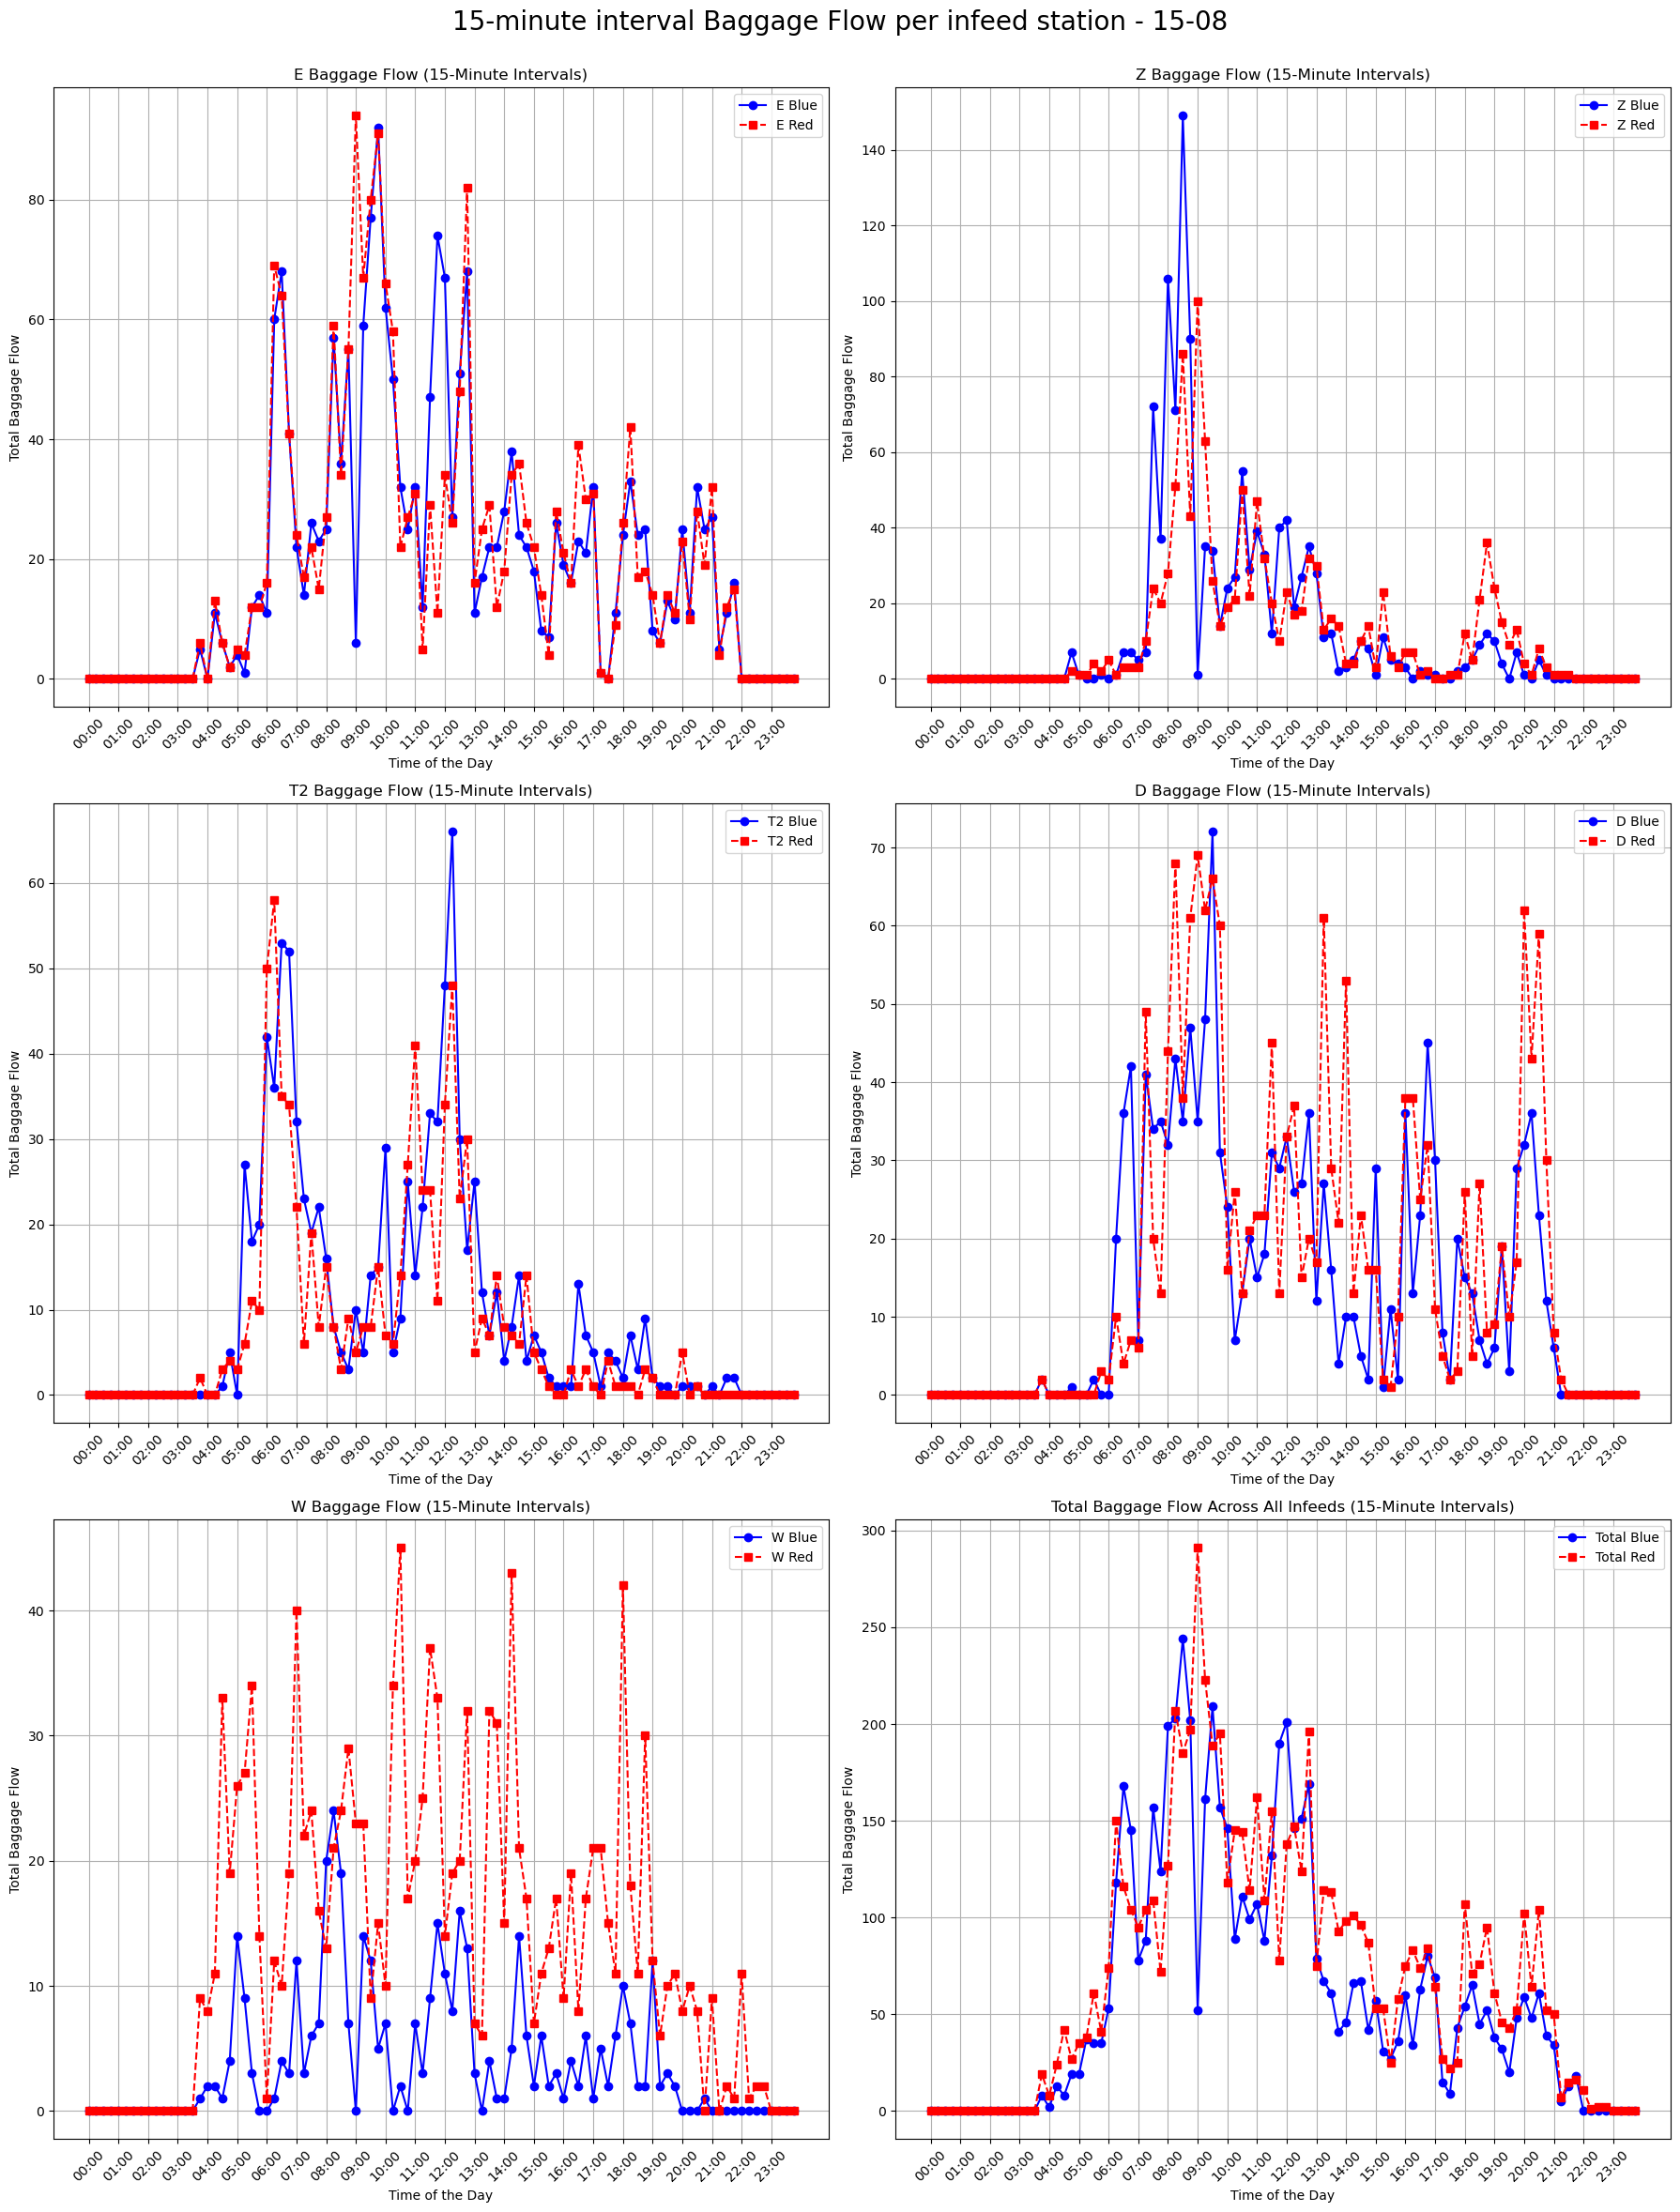

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# File path and sheet name
file_path = r"C:\\Users\\miche\\Downloads\\01-06 Load on BB.xlsx"
date = '15-08'
df = pd.read_excel(file_path, sheet_name=date)

# Define column lists for all infeeds
infeed_columns = {
    'E': {
        'Blue': [
            'C via BB (10033) to W', 'C via BB (10033) to Z', 'C via BB (10034) to Z',
            'C via BB (10630) to E', 'C via BB (10630) to D', 'C via BB (10630) to W',
            'C via BB (10630) to Z', 'UQE via BB (10630) to D', 'UQE via BB (10630) to E',
            'UQE via BB (10630) to Z', 'UQE via BB (10630) to W', 'UQE via BB (10033) to W',
            'UQE via BB (10033) to Z', 'UQE via BB (10033) to E', 'UQE via BB (10034) to W',
            'UQE via BB (10034) to Z', 'UQE via BB (10009) to D', 'UQE via BB (10009) to Z',
        ],
        'Red': [
            'UQE via BB (10640) to D', 'UQE via BB (10640) to E', 'UQE via BB (10640) to Z',
            'UQE via BB (10008) to D', 'UQE via BB (10008) to Z', 'UQE via BB (10035) to D',
            'UQE via BB (10035) to W', 'UQE via BB (10035) to Z', 'C via BB (10640) to E',
            'C via BB (10008) to Z', 'C via BB (10640) to D', 'C via BB (10640) to W',
            'C via BB (10640) to Z',
        ]
    },
    'Z': {
        'Blue': [
            'Z via BB (10630) to D', 'Z via BB (10630) to E', 'Z via BB (10630) to W', 
            'Z via BB (10009) to D',
        ],
        'Red': [
            'Z via BB (10640) to D', 'Z via BB (10640) to E', 'Z via BB (10640) to W',
        ]
    },
    'T2': {
        'Blue': [
            'T2 via BB (10010) to Z', 'T2 via BB (10033) to Z', 'T2 via BB (10034) to E', 
            'T2 via BB (10034) to Z', 'T2 via BB (10630) to D', 'T2 via BB (10630) to E', 
            'T2 via BB (10630) to W',
        ],
        'Red': [
            'T2 via BB (10011) to Z', 'T2 via BB (10640) to E', 'T2 via BB (10008) to Z',
            'T2 via BB (10640) to D', 'T2 via BB (10640) to W',
        ]
    },
    'D': {
        'Blue': [
            'TSD via BB (10009) to D', 'TSD via BB (10009) to W', 'TSD via BB (10009) to Z',
            'TSD via BB (10033) to Z', 'TSD via BB (10034) to E', 'TSD via BB (10034) to Z',
            'TSD via BB (10630) to D', 'TSD via BB (10630) to E', 'TSD via BB (10630) to W',
            'TSD via BB (10630) to Z',
        ],
        'Red': [
            'TSD via BB (10008) to D', 'TSD via BB (10008) to W', 'TSD via BB (10008) to Z',
            'TSD via BB (10011) to Z', 'TSD via BB (10640) to D', 'TSD via BB (10640) to W',
            'TSD via BB (10640) to Z', 'TSD via BB (10640) to E',
        ]
    },
    'W': {
        'Blue': [
            'W via BB (10630) to E', 'W via BB (10630) to W', 'W via BB (10630) to D',
            'W via BB (10010) to Z', 'W via BB (10009) to D', 'W via BB (10009) to Z',
            'W via BB (10034) to Z',
        ],
        'Red': [
            'W via BB (10640) to E', 'W via BB (10640) to D', 'W via BB (10640) to Z',
            'W via BB (10011) to Z', 'W via BB (10008) to D', 'W via BB (10008) to Z',
        ]
    }
}

# Generate time labels
time_labels = pd.date_range(start="00:00", end="23:45", freq="15T").strftime("%H:%M")

# Process each infeed
fifteen_minute_totals = {
    'Blue': pd.Series(0, index=range(len(time_labels))),
    'Red': pd.Series(0, index=range(len(time_labels)))
}

infeed_totals = {}

for infeed, color_columns in infeed_columns.items():
    infeed_totals[infeed] = {'Blue': pd.Series(0, index=range(len(time_labels))), 'Red': pd.Series(0, index=range(len(time_labels)))}
    for color, columns in color_columns.items():
        # Filter valid columns
        valid_columns = [col for col in columns if col in df.columns]
        filtered_df = df[valid_columns]

        # Sum across valid columns for each 15-minute interval
        totals = filtered_df.sum(axis=1)

        # Accumulate totals for each infeed
        infeed_totals[infeed][color] += totals.reset_index(drop=True)

        # Accumulate totals for all infeeds
        fifteen_minute_totals[color] += totals.reset_index(drop=True)

# Create subplots for six slots
fig, axes = plt.subplots(3, 2, figsize=(18, 24))
axes = axes.flatten()

# Plot individual infeeds (first five)
for i, (infeed, totals) in enumerate(infeed_totals.items()):
    axes[i].plot(time_labels, totals['Blue'].values, marker='o', linestyle='-', color='b', label=f'{infeed} Blue')
    axes[i].plot(time_labels, totals['Red'].values, marker='s', linestyle='--', color='r', label=f'{infeed} Red')
    axes[i].set_title(f'{infeed} Baggage Flow (15-Minute Intervals)')
    axes[i].set_xlabel('Time of the Day')
    axes[i].set_ylabel('Total Baggage Flow')
    axes[i].set_xticks(range(0, len(time_labels), 4))  # Show every 1-hour interval on the x-axis
    axes[i].set_xticklabels(time_labels[::4], rotation=45)
    axes[i].legend()
    axes[i].grid(True)

# Plot totals for all infeeds in the sixth subplot
axes[5].plot(time_labels, fifteen_minute_totals['Blue'].values, marker='o', linestyle='-', color='b', label='Total Blue')
axes[5].plot(time_labels, fifteen_minute_totals['Red'].values, marker='s', linestyle='--', color='r', label='Total Red')
axes[5].set_title('Total Baggage Flow Across All Infeeds (15-Minute Intervals)')
axes[5].set_xlabel('Time of the Day')
axes[5].set_ylabel('Total Baggage Flow')
axes[5].set_xticks(range(0, len(time_labels), 4))  # Show every 1-hour interval on the x-axis
axes[5].set_xticklabels(time_labels[::4], rotation=45)
axes[5].legend()
axes[5].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle(f'15-minute interval Baggage Flow per infeed station - {date}', fontsize=20)

# Save and show the plot
output_path = f"C:\\Users\\miche\\Downloads\\15-minute baggage flow.png"  # Update the path as needed
plt.savefig(output_path, format='png', dpi=300)  # Save as PNG with high resolution
plt.show()



C:\Users\miche\AppData\Local\Temp\ipykernel_8764\2579934972.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data_1 = df1.resample('H').sum()
C:\Users\miche\AppData\Local\Temp\ipykernel_8764\2579934972.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data_2 = df2.resample('H').sum()


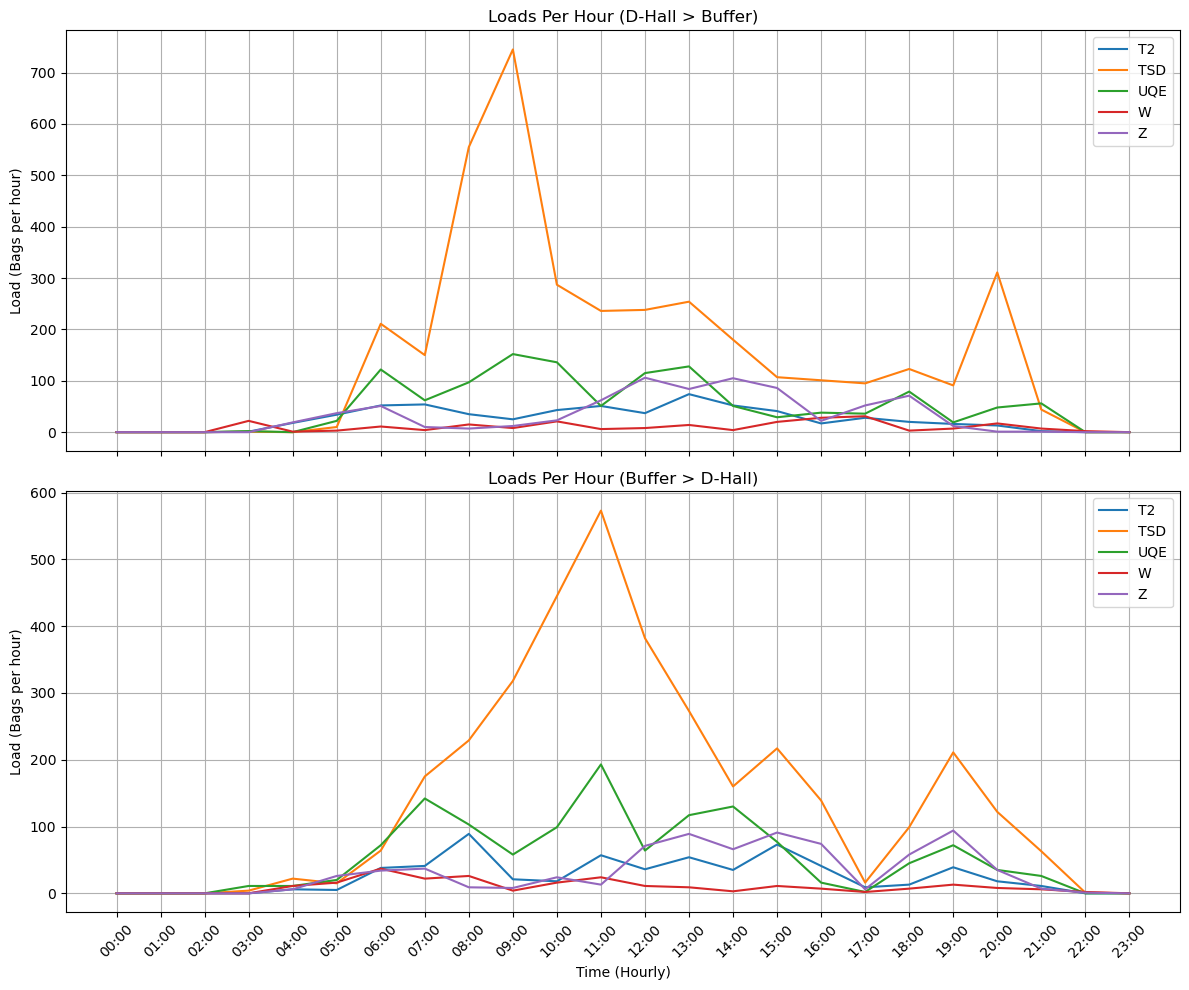

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = r"C:\Users\miche\Downloads\Total D - Buffer.xlsx"

# First sheet
sheet_name_1 = "D-Pier > Buffer 15-08"
df1 = pd.read_excel(file_path, sheet_name=sheet_name_1)

# Convert the _time column to datetime
df1['_time'] = pd.to_datetime(df1['_time'])

# Set _time as the index
df1.set_index('_time', inplace=True)

# Resample the data to hourly sums
hourly_data_1 = df1.resample('H').sum()

# Second sheet
sheet_name_2 = "Buffer > D-pier 15-08"
df2 = pd.read_excel(file_path, sheet_name=sheet_name_2)

# Convert the _time column to datetime
df2['_time'] = pd.to_datetime(df2['_time'])

# Set _time as the index
df2.set_index('_time', inplace=True)

# Resample the data to hourly sums
hourly_data_2 = df2.resample('H').sum()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot data for the first sheet
for column in hourly_data_1.columns:
    axes[0].plot(hourly_data_1.index, hourly_data_1[column], label=column)

axes[0].set_title('Loads Per Hour (D-Hall > Buffer)')
axes[0].set_ylabel('Load (Bags per hour)')
axes[0].legend()
axes[0].grid(True)

# Plot data for the second sheet
for column in hourly_data_2.columns:
    axes[1].plot(hourly_data_2.index, hourly_data_2[column], label=column)

axes[1].set_title('Loads Per Hour (Buffer > D-Hall)')
axes[1].set_xlabel('Time (Hourly)')
axes[1].set_ylabel('Load (Bags per hour)')
axes[1].legend()
axes[1].grid(True)

# Format x-axis for hourly intervals
plt.xticks(hourly_data_1.index, [t.strftime('%H:%M') for t in hourly_data_1.index], rotation=45)
plt.tight_layout()
plt.show()

# Format the index of hourly_data_1 to only include the time (HH:MM)
hourly_data_1.index = hourly_data_1.index.strftime('%H:%M')

# Generate LaTeX table for hourly_data_1
latex_table_1 = hourly_data_1.to_latex(
    index=True,
    caption='Hourly Loads for D-Hall to Buffer (15-08)',
    label='tab:dpier_to_buffer'
)

# Format the index of hourly_data_2 to only include the time (HH:MM)
hourly_data_2.index = hourly_data_2.index.strftime('%H:%M')

# Generate LaTeX table for hourly_data_2
latex_table_2 = hourly_data_2.to_latex(
    index=True,
    caption='Hourly Loads for Buffer to D-Hall (15-08)',
    label='tab:buffer_to_dpier'
)




# Infeed West

C:\Users\miche\AppData\Local\Temp\ipykernel_24596\3394697992.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_incidents['Color_Label'] = df_filtered_incidents['Code'].apply(
C:\Users\miche\AppData\Local\Temp\ipykernel_24596\3394697992.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_incidents['Restored_Date'] = df_filtered_incidents['Restored_DateTime'].dt.date
C:\Users\miche\AppData\Local\Temp\ipykernel_24596\3394697992.py:31: UserWarning: Parsing dates in %d-%m-%Y format wh

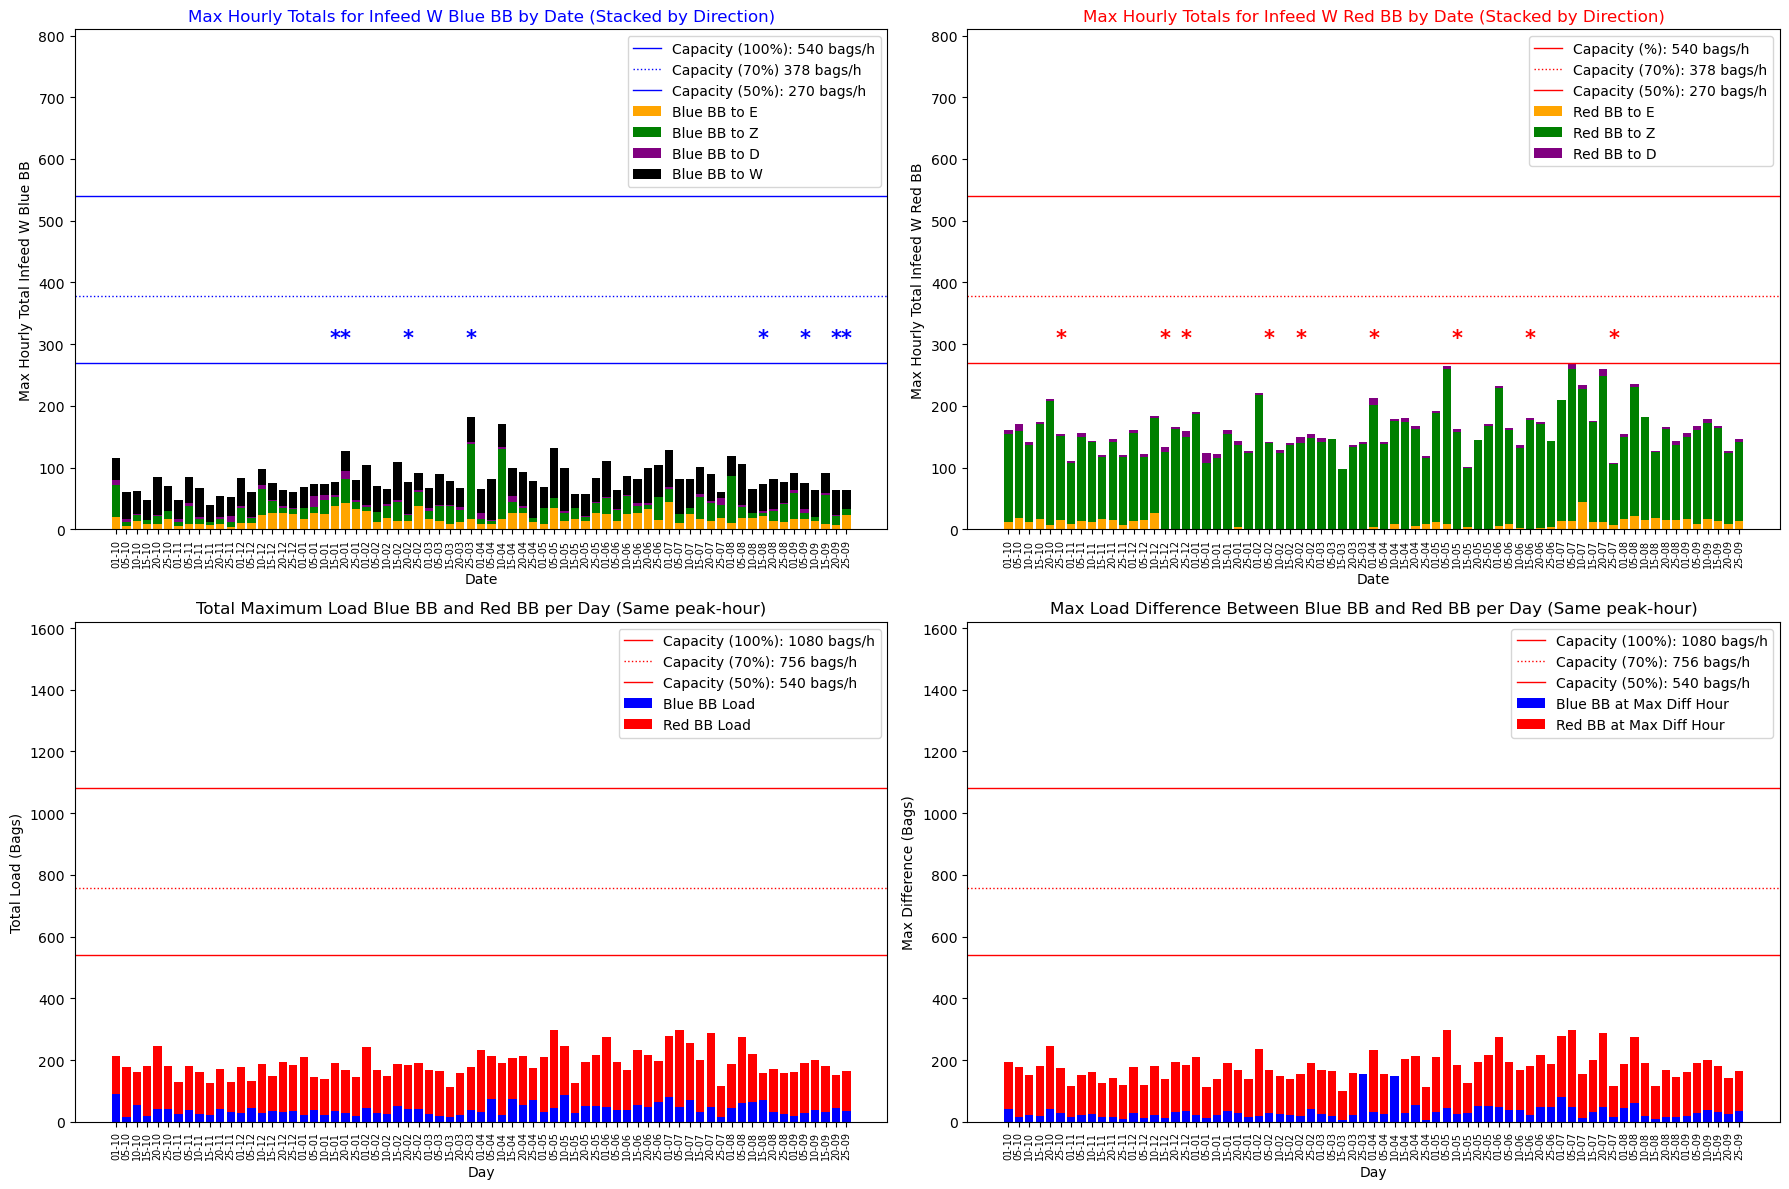

In [19]:
# Load the incident Excel file
incident_file_path = r'C:\Users\miche\Downloads\Backbone incidenten.xlsx'
df_incidents = pd.read_excel(incident_file_path)

# Convert 'Function restored' column to datetime and extract date and time
df_incidents['Restored_DateTime'] = pd.to_datetime(df_incidents['Function Restored'], errors='coerce')

# Extract the 'Code' column
code_column = df_incidents['Code']

# Get the 8 most frequent values
top_8_frequent_codes = code_column.value_counts().head(8).index

# Filter the DataFrame to include only the top 8 codes
df_filtered_incidents = df_incidents[df_incidents['Code'].isin(top_8_frequent_codes)]

# Define blue and red code groups
blue_codes = ['.BS10615', '.BS10630', '.BS10650', '.BS10653', '.BS10654', '.BS10655', '.BS10610']
red_codes = ['.BS10640', '.BS10651', '.BS10620', '.BS10011']

# Assign blue or red labels to the filtered DataFrame
df_filtered_incidents['Color_Label'] = df_filtered_incidents['Code'].apply(
    lambda x: 'blue' if x in blue_codes else 'red' if x in red_codes else 'other'
)

# Extract just the date from the 'Restored_DateTime' column
df_filtered_incidents['Restored_Date'] = df_filtered_incidents['Restored_DateTime'].dt.date

# Define the date range for filtering (01-10-2023 to 20-09-2024)
start_date = pd.to_datetime('01-10-2023').date()
end_date = pd.to_datetime('20-09-2024').date()

# Get the unique dates for blue and red BB incidents within the date range
blue_bb_days = df_filtered_incidents[
    (df_filtered_incidents['Color_Label'] == 'blue') & 
    (df_filtered_incidents['Restored_Date'] >= start_date) & 
    (df_filtered_incidents['Restored_Date'] <= end_date)
]['Restored_Date'].unique()

red_bb_days = df_filtered_incidents[
    (df_filtered_incidents['Color_Label'] == 'red') & 
    (df_filtered_incidents['Restored_Date'] >= start_date) & 
    (df_filtered_incidents['Restored_Date'] <= end_date)
]['Restored_Date'].unique()

# Convert red_bb_days to 'dd-mm' string format
blue_bb_days = [day.strftime('%d-%m') for day in blue_bb_days]
red_bb_days = [day.strftime('%d-%m') for day in red_bb_days]

#print(red_bb_days)
# Correctly assign the file path to the file_path variable
file_path = r"C:\\Users\\miche\\Downloads\\01-06 Load on BB.xlsx"

# Load all sheets from the Excel file
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Define Infeed_W_Blue_BB and Infeed_W_Red_BB columns
Infeed_W_Blue_BB_columns = [
    'W via BB (10630) to E', 'W via BB (10630) to W',
    'W via BB (10630) to D', 'W via BB (10010) to Z',
    'W via BB (10009) to D', 'W via BB (10009) to Z',
    'W via BB (10034) to Z'
]
Infeed_W_Red_BB_columns = [
    'W via BB (10640) to E', 'W via BB (10640) to D',
    'W via BB (10640) to Z', 'W via BB (10011) to Z',
    'W via BB (10008) to D', 'W via BB (10008) to Z'
]

# Dictionary to store max hourly totals for Infeed W Blue BB and Red BB
max_hourly_totals_infeed_w_blue_dict = {}
max_hourly_totals_infeed_w_red_dict = {}

# List to store the total maximum loads and differences for each day
total_max_loads_per_day = []
differences_per_day = []

# Process each sheet in the Excel file
for sheet_name, df in sheets_dict.items():
    # Handle missing columns for Blue BB
    for col in Infeed_W_Blue_BB_columns:
        df[col] = df.get(col, 0)

    # Handle missing columns for Red BB
    for col in Infeed_W_Red_BB_columns:
        df[col] = df.get(col, 0)

    # Process only the relevant columns for Blue BB and Red BB
    Blue_BB_df = df[Infeed_W_Blue_BB_columns].copy()
    Red_BB_df = df[Infeed_W_Red_BB_columns].copy()

    # Add 'Hour' column based on index (assuming 15-minute intervals)
    Blue_BB_df['Hour'] = (Blue_BB_df.index // 4) + 1
    Red_BB_df['Hour'] = (Red_BB_df.index // 4) + 1

    # Group by 'Hour' and sum the values in each column
    hourly_sums_blue = Blue_BB_df.groupby('Hour').sum()
    hourly_sums_red = Red_BB_df.groupby('Hour').sum()

    # Calculate total sum across all columns for each hour
    hourly_totals_blue = hourly_sums_blue.sum(axis=1)
    hourly_totals_red = hourly_sums_red.sum(axis=1)

    # Max Hourly Totals for Infeed W Blue BB and Red BB
    max_hourly_totals_infeed_w_blue_dict[sheet_name] = hourly_totals_blue.max()
    max_hourly_totals_infeed_w_red_dict[sheet_name] = hourly_totals_red.max()

    # Find the maximum combined total load for Blue BB and Red BB
    max_total_hour = (hourly_totals_blue + hourly_totals_red).idxmax()
    total_max_loads_per_day.append({
        'day': sheet_name,
        'max_total_load_blue': hourly_totals_blue.loc[max_total_hour],
        'max_total_load_red': hourly_totals_red.loc[max_total_hour],
        'max_total_hour': max_total_hour
    })

    # Calculate the absolute differences in hourly totals between Blue BB and Red BB
    hourly_total_diff = abs(hourly_totals_blue - hourly_totals_red)

    # Find the maximum difference and the hour at which it occurred
    max_diff = hourly_total_diff.max()
    max_diff_hour = hourly_total_diff.idxmax()

    # Store the differences for the day
    differences_per_day.append({
        'day': sheet_name,
        'max_difference': max_diff,
        'max_diff_hour': max_diff_hour,
        'load_blue_at_diff_hour': hourly_totals_blue.loc[max_diff_hour],
        'load_red_at_diff_hour': hourly_totals_red.loc[max_diff_hour]
    })

# Prepare data for plotting
sheet_names_infeed_w_blue = list(max_hourly_totals_infeed_w_blue_dict.keys())
sheet_names_infeed_w_red = list(max_hourly_totals_infeed_w_red_dict.keys())
days = [result['day'] for result in total_max_loads_per_day]
blue_loads = [result['max_total_load_blue'] for result in total_max_loads_per_day]
red_loads = [result['max_total_load_red'] for result in total_max_loads_per_day]
max_differences_blue = [result['load_blue_at_diff_hour'] for result in differences_per_day]
max_differences_red = [result['load_red_at_diff_hour'] for result in differences_per_day]

# Subplot setup with 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Define the columns by direction
blue_columns_by_direction = {
    'E': ['W via BB (10630) to E'],
    'Z': ['W via BB (10010) to Z', 'W via BB (10009) to Z', 'W via BB (10034) to Z'],
    'D': ['W via BB (10630) to D', 'W via BB (10009) to D'],
    'W': ['W via BB (10630) to W']
}

red_columns_by_direction = {
    'E': ['W via BB (10640) to E'],
    'Z': ['W via BB (10640) to Z', 'W via BB (10011) to Z', 'W via BB (10008) to Z'],
    'D': ['W via BB (10640) to D', 'W via BB (10008) to D']
}


# Define y-axis multiplier
y_limit_multiplier = 1.5


# Colors for each direction
direction_colors = {
    'E': 'orange',
    'Z': 'green',
    'D': 'purple',
    'W': 'black'
}

# First subplot: Max Hourly Totals for Infeed W Blue BB by Date (Stacked by Direction)
bottom = None
for direction, columns in blue_columns_by_direction.items():
    sums_for_direction = [
        sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max()
        for sheet_name in sheet_names_infeed_w_blue
    ]
    if bottom is None:
        axs[0, 0].bar(sheet_names_infeed_w_blue, sums_for_direction, color=direction_colors[direction], label=f'Blue BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 0].bar(sheet_names_infeed_w_blue, sums_for_direction, bottom=bottom, color=direction_colors[direction], label=f'Blue BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

# Add annotations and adjust y-axis
for i, day in enumerate(days):
    if day in blue_bb_days:
        axs[0, 0].text(i, 300, '*', color='b', fontsize=15, fontweight='bold', ha='center')


axs[0, 0].set_ylim(0, 540 * y_limit_multiplier)  # Adjust y-axis limit
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Max Hourly Total Infeed W Blue BB')
axs[0, 0].set_title('Max Hourly Totals for Infeed W Blue BB by Date (Stacked by Direction)', color='b')
axs[0, 0].axhline(y=540, color='b', linestyle='-', linewidth=1, label='Capacity (100%): 540 bags/h')
axs[0, 0].axhline(y=540 * 0.7, color='b', linestyle=':', linewidth=1, label='Capacity (70%) 378 bags/h')
axs[0, 0].axhline(y=540 * 0.5, color='b', linestyle='-', linewidth=1, label='Capacity (50%): 270 bags/h')
axs[0, 0].tick_params(axis='x', rotation=90, labelsize=7)
axs[0, 0].legend(loc='upper right')

# Second subplot: Max Hourly Totals for Infeed W Red BB by Date (Stacked by Direction)
bottom = None
for direction, columns in red_columns_by_direction.items():
    sums_for_direction = [
        sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max()
        for sheet_name in sheet_names_infeed_w_red
    ]
    if bottom is None:
        axs[0, 1].bar(sheet_names_infeed_w_red, sums_for_direction, color=direction_colors[direction], label=f'Red BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 1].bar(sheet_names_infeed_w_red, sums_for_direction, bottom=bottom, color=direction_colors[direction], label=f'Red BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

# Mark asterisks for red BB incident days
for i, day in enumerate(days):
    if day in red_bb_days:
        axs[0, 1].text(i, 300, '*', color='r', fontsize=15, fontweight='bold', ha='center')

axs[0, 1].set_ylim(0, 540 * y_limit_multiplier)  # Adjust y-axis limit
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Max Hourly Total Infeed W Red BB')
axs[0, 1].set_title('Max Hourly Totals for Infeed W Red BB by Date (Stacked by Direction)', color='r')
axs[0, 1].axhline(y=540, color='r', linestyle='-', linewidth=1, label='Capacity (%): 540 bags/h')
axs[0, 1].axhline(y=540 * 0.7, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 378 bags/h')
axs[0, 1].axhline(y=540 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 270 bags/h')
axs[0, 1].tick_params(axis='x', rotation=90, labelsize=7)
axs[0, 1].legend(loc='upper right')

# Third subplot: Total Maximum Load (Blue BB and Red BB) per Day
axs[1, 0].bar(days, blue_loads, label='Blue BB Load', color='blue')
axs[1, 0].bar(days, red_loads, bottom=blue_loads, label='Red BB Load', color='red')
axs[1, 0].set_ylim(0, 1080 * y_limit_multiplier)  # Adjust y-axis limit
axs[1, 0].set_xlabel('Day')
axs[1, 0].set_ylabel('Total Load (Bags)')
axs[1, 0].set_title('Total Maximum Load Blue BB and Red BB per Day (Same peak-hour)')
axs[1, 0].axhline(y=540 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1080 bags/h')
axs[1, 0].axhline(y=540 * 0.7 * 2, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 756 bags/h')
axs[1, 0].axhline(y=540 * 0.5 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 540 bags/h')
axs[1, 0].tick_params(axis='x', rotation=90, labelsize=7)
axs[1, 0].legend(loc='upper right')

# Fourth subplot: Stacked Max Load Difference Between Blue BB and Red BB with ratios
axs[1, 1].bar(days, max_differences_blue, label='Blue BB at Max Diff Hour', color='blue')
axs[1, 1].bar(days, max_differences_red, bottom=max_differences_blue, label='Red BB at Max Diff Hour', color='red')
axs[1, 1].set_ylim(0, 1080 * y_limit_multiplier)  # Adjust y-axis limit
axs[1, 1].set_xlabel('Day')
axs[1, 1].set_ylabel('Max Difference (Bags)')
axs[1, 1].set_title('Max Load Difference Between Blue BB and Red BB per Day (Same peak-hour)')
axs[1, 1].axhline(y=540 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1080 bags/h')
axs[1, 1].axhline(y=540 * 0.7 * 2, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 756 bags/h')
axs[1, 1].axhline(y=540 * 0.5 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 540 bags/h')
axs[1, 1].tick_params(axis='x', rotation=90, labelsize=7)
axs[1, 1].legend(loc='upper right')

# Adjust layout for clarity
plt.tight_layout()
output_path = f"C:\\Users\\miche\\Downloads\\W infeed figure.png"  # Update the path as needed
plt.savefig(output_path, format='png', dpi=300)  # Save as PNG with high resolution
plt.show()



# Infeed D-pier

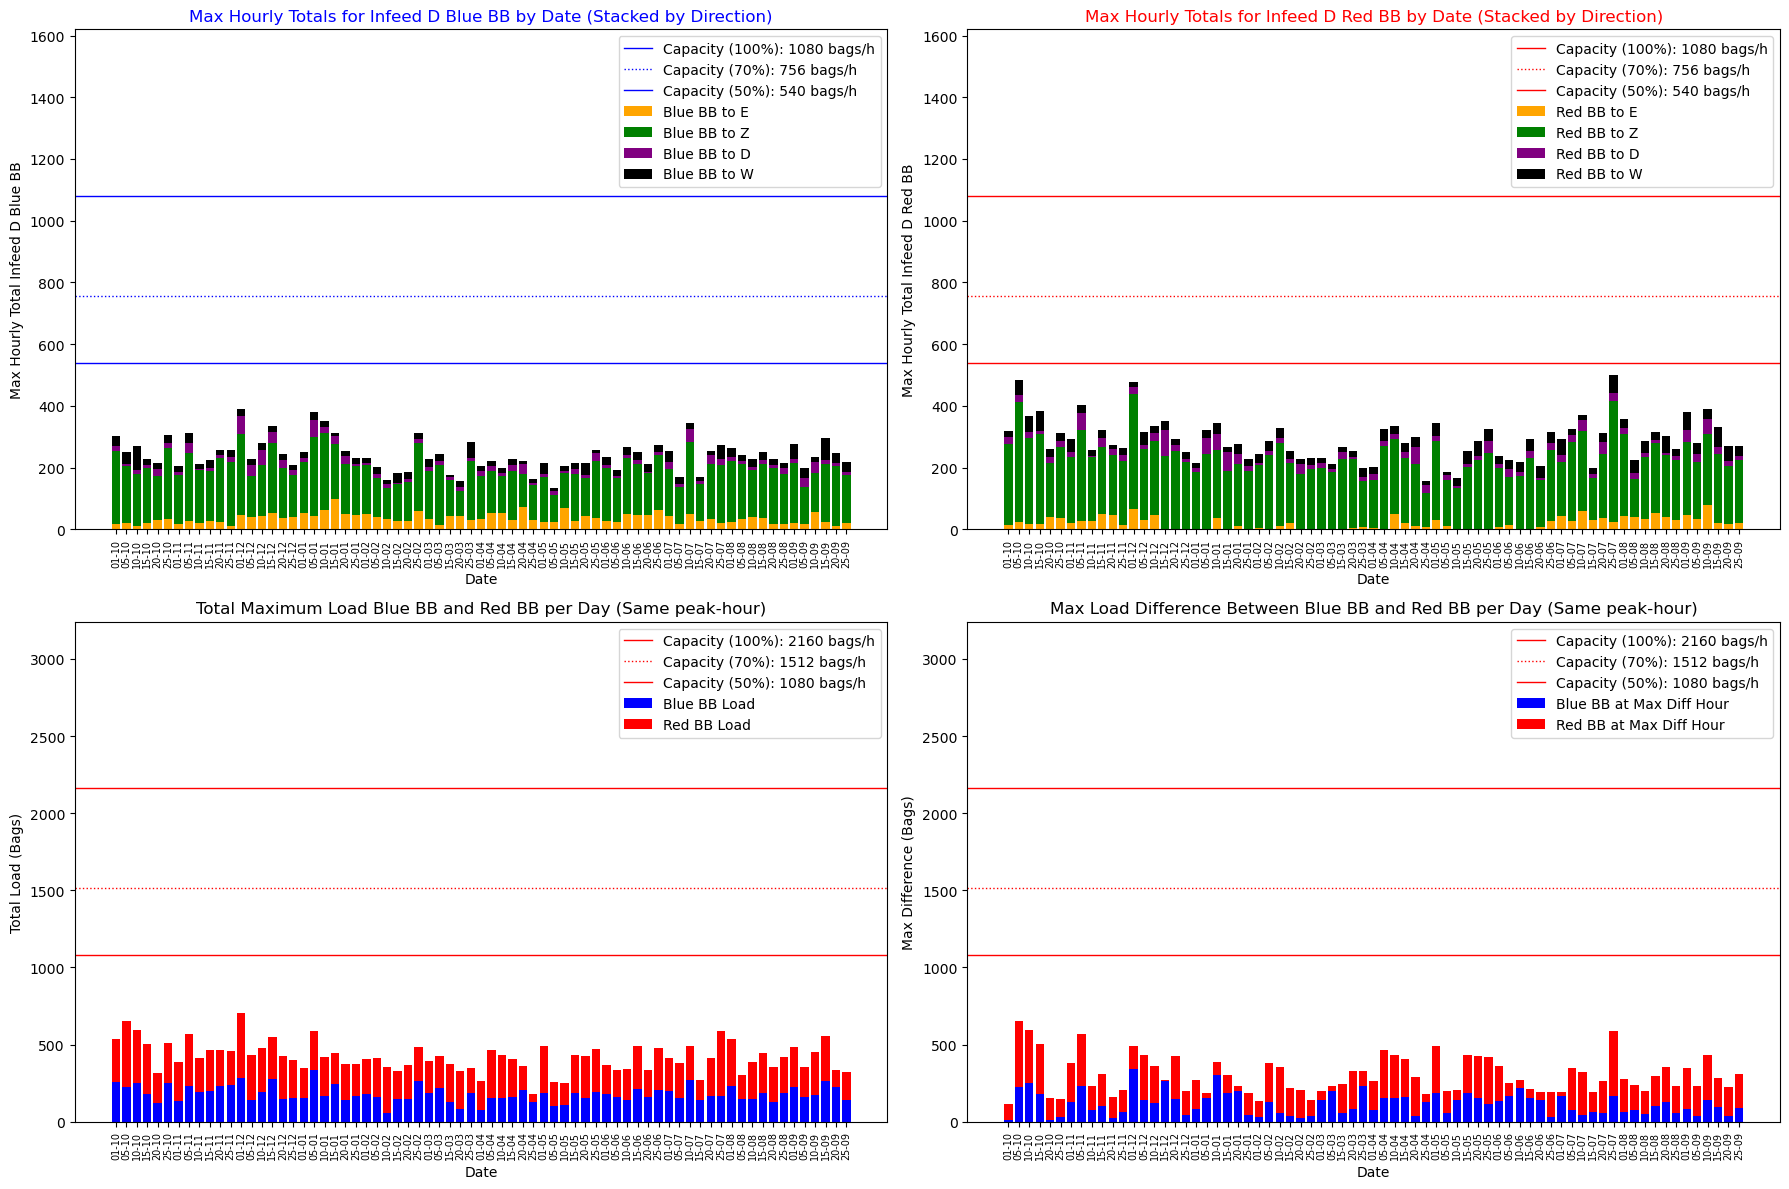

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Correctly assign the file path to the file_path variable
file_path = r"C:\\Users\\miche\\Downloads\\01-06 Load on BB.xlsx"

# Load all sheets from the Excel file
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Define Infeed_D_Blue_BB and Infeed_D_Red_BB columns for D-hall
Infeed_D_Blue_BB_columns = [
    'TSD via BB (10009) to D', 'TSD via BB (10009) to W',
    'TSD via BB (10009) to Z', 'TSD via BB (10033) to Z',
    'TSD via BB (10034) to E', 'TSD via BB (10034) to Z',
    'TSD via BB (10630) to D', 'TSD via BB (10630) to E',
    'TSD via BB (10630) to W', 'TSD via BB (10630) to Z'
]

Infeed_D_Red_BB_columns = [
    'TSD via BB (10008) to D', 'TSD via BB (10008) to W',
    'TSD via BB (10008) to Z', 'TSD via BB (10011) to Z',
    'TSD via BB (10640) to D', 'TSD via BB (10640) to W',
    'TSD via BB (10640) to Z', 'TSD via BB (10640) to E'
]

# Dictionary to store max hourly totals for Infeed D Blue BB and Red BB
max_hourly_totals_infeed_d_blue_dict = {}
max_hourly_totals_infeed_d_red_dict = {}

# List to store the total maximum loads and differences for each day
total_max_loads_per_day = []
differences_per_day = []

# Process each sheet in the Excel file
for sheet_name, df in sheets_dict.items():
    # Handle missing columns for Blue BB
    for col in Infeed_D_Blue_BB_columns:
        df[col] = df.get(col, 0)

    # Handle missing columns for Red BB
    for col in Infeed_D_Red_BB_columns:
        df[col] = df.get(col, 0)

    # Process only the relevant columns for Blue BB and Red BB
    Blue_BB_df = df[Infeed_D_Blue_BB_columns].copy()
    Red_BB_df = df[Infeed_D_Red_BB_columns].copy()

    # Add 'Hour' column based on index (assuming 15-minute intervals)
    Blue_BB_df['Hour'] = (Blue_BB_df.index // 4) + 1
    Red_BB_df['Hour'] = (Red_BB_df.index // 4) + 1

    # Group by 'Hour' and sum the values in each column
    hourly_sums_blue = Blue_BB_df.groupby('Hour').sum()
    hourly_sums_red = Red_BB_df.groupby('Hour').sum()

    # Calculate total sum across all columns for each hour
    hourly_totals_blue = hourly_sums_blue.sum(axis=1)
    hourly_totals_red = hourly_sums_red.sum(axis=1)

    # Max Hourly Totals for Infeed D Blue BB and Red BB
    max_hourly_totals_infeed_d_blue_dict[sheet_name] = hourly_totals_blue.max()
    max_hourly_totals_infeed_d_red_dict[sheet_name] = hourly_totals_red.max()

    # Find the maximum combined total load for Blue BB and Red BB
    max_total_hour = (hourly_totals_blue + hourly_totals_red).idxmax()
    total_max_loads_per_day.append({
        'day': sheet_name,
        'max_total_load_blue': hourly_totals_blue.loc[max_total_hour],
        'max_total_load_red': hourly_totals_red.loc[max_total_hour],
        'max_total_hour': max_total_hour
    })

    # Calculate the absolute differences in hourly totals between Blue BB and Red BB
    hourly_total_diff = abs(hourly_totals_blue - hourly_totals_red)

    # Find the maximum difference and the hour at which it occurred
    max_diff = hourly_total_diff.max()
    max_diff_hour = hourly_total_diff.idxmax()

    # Store the differences for the day
    differences_per_day.append({
        'day': sheet_name,
        'max_difference': max_diff,
        'max_diff_hour': max_diff_hour,
        'load_blue_at_diff_hour': hourly_totals_blue.loc[max_diff_hour],
        'load_red_at_diff_hour': hourly_totals_red.loc[max_diff_hour]
    })

# Prepare data for plotting
sheet_names_infeed_d_blue = list(max_hourly_totals_infeed_d_blue_dict.keys())
sheet_names_infeed_d_red = list(max_hourly_totals_infeed_d_red_dict.keys())
days = [result['day'] for result in total_max_loads_per_day]
blue_loads = [result['max_total_load_blue'] for result in total_max_loads_per_day]
red_loads = [result['max_total_load_red'] for result in total_max_loads_per_day]
max_differences_blue = [result['load_blue_at_diff_hour'] for result in differences_per_day]
max_differences_red = [result['load_red_at_diff_hour'] for result in differences_per_day]


# Define the columns by direction for D-hall
blue_columns_by_direction_d = {
    'E': ['TSD via BB (10034) to E', 'TSD via BB (10630) to E'],
    'Z': ['TSD via BB (10009) to Z', 'TSD via BB (10033) to Z', 'TSD via BB (10034) to Z', 'TSD via BB (10630) to Z'],
    'D': ['TSD via BB (10009) to D', 'TSD via BB (10630) to D'],
    'W': ['TSD via BB (10009) to W', 'TSD via BB (10630) to W']
}

red_columns_by_direction_d = {
    'E': ['TSD via BB (10640) to E'],
    'Z': ['TSD via BB (10008) to Z', 'TSD via BB (10011) to Z', 'TSD via BB (10640) to Z'],
    'D': ['TSD via BB (10008) to D', 'TSD via BB (10640) to D'],
    'W': ['TSD via BB (10008) to W', 'TSD via BB (10640) to W']
}

direction_colors_d = {
    'E': 'orange',
    'Z': 'green',
    'D': 'purple',
    'W': 'black'
}

# Define y-axis multiplier to add space for legends and markers
y_limit_multiplier = 1.5

# Set up a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Colors and directions for D-hall
direction_colors_d = {'E': 'orange', 'Z': 'green', 'D': 'purple', 'W': 'black'}

# 1. Max Hourly Totals for Infeed D Blue BB by Date (Stacked by Direction)
bottom = None
for direction, columns in blue_columns_by_direction_d.items():
    sums_for_direction = [sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max() for sheet_name in sheet_names_infeed_d_blue]
    if bottom is None:
        axs[0, 0].bar(sheet_names_infeed_d_blue, sums_for_direction, color=direction_colors_d[direction], label=f'Blue BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 0].bar(sheet_names_infeed_d_blue, sums_for_direction, bottom=bottom, color=direction_colors_d[direction], label=f'Blue BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

# Set limits, labels, and title
axs[0, 0].set_ylim(0, 1080 * y_limit_multiplier)
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Max Hourly Total Infeed D Blue BB')
axs[0, 0].set_title('Max Hourly Totals for Infeed D Blue BB by Date (Stacked by Direction)', color='b')
axs[0, 0].axhline(y=1080, color='b', linestyle='-', linewidth=1, label='Capacity (100%): 1080 bags/h')
axs[0, 0].axhline(y=1080 * 0.70, color='b', linestyle=':', linewidth=1, label='Capacity (70%): 756 bags/h')
axs[0, 0].axhline(y=1080 * 0.5, color='b', linestyle='-', linewidth=1, label='Capacity (50%): 540 bags/h')
axs[0, 0].legend(loc='upper right')
axs[0, 0].tick_params(axis='x', rotation=90, labelsize=7)

# 2. Max Hourly Totals for Infeed D Red BB by Date (Stacked by Direction)
bottom = None
for direction, columns in red_columns_by_direction_d.items():
    sums_for_direction = [sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max() for sheet_name in sheet_names_infeed_d_red]
    if bottom is None:
        axs[0, 1].bar(sheet_names_infeed_d_red, sums_for_direction, color=direction_colors_d[direction], label=f'Red BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 1].bar(sheet_names_infeed_d_red, sums_for_direction, bottom=bottom, color=direction_colors_d[direction], label=f'Red BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

# Set limits, labels, and title
axs[0, 1].set_ylim(0, 1080 * y_limit_multiplier)
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Max Hourly Total Infeed D Red BB')
axs[0, 1].set_title('Max Hourly Totals for Infeed D Red BB by Date (Stacked by Direction)', color='r')
axs[0, 1].axhline(y=1080, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1080 bags/h')
axs[0, 1].axhline(y=1080 * 0.70, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 756 bags/h')
axs[0, 1].axhline(y=1080 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 540 bags/h')
axs[0, 1].legend(loc='upper right')
axs[0, 1].tick_params(axis='x', rotation=90, labelsize=7)

# 3. Total Maximum Load (Blue BB and Red BB) per Day
axs[1, 0].bar(days, blue_loads, label='Blue BB Load', color='blue')
axs[1, 0].bar(days, red_loads, bottom=blue_loads, label='Red BB Load', color='red')
axs[1, 0].set_ylim(0, 1080 * 2 * y_limit_multiplier)
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Total Load (Bags)')
axs[1, 0].set_title('Total Maximum Load Blue BB and Red BB per Day (Same peak-hour)')
axs[1, 0].axhline(y=1080 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 2160 bags/h')
axs[1, 0].axhline(y=1080 * 0.7 * 2, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 1512 bags/h')
axs[1, 0].axhline(y=1080 * 0.5 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 1080 bags/h')
axs[1, 0].legend(loc='upper right')
axs[1, 0].tick_params(axis='x', rotation=90, labelsize=7)

# 4. Stacked Max Load Difference Between Blue BB and Red BB
axs[1, 1].bar(days, max_differences_blue, label='Blue BB at Max Diff Hour', color='blue')
axs[1, 1].bar(days, max_differences_red, bottom=max_differences_blue, label='Red BB at Max Diff Hour', color='red')
axs[1, 1].set_ylim(0, 1080 * 2 * y_limit_multiplier)
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Max Difference (Bags)')
axs[1, 1].set_title('Max Load Difference Between Blue BB and Red BB per Day (Same peak-hour)')
axs[1, 1].axhline(y=1080 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 2160 bags/h')
axs[1, 1].axhline(y=1080 * 0.7 * 2, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 1512 bags/h')
axs[1, 1].axhline(y=1080 * 0.5 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 1080 bags/h')
axs[1, 1].legend(loc='upper right')
axs[1, 1].tick_params(axis='x', rotation=90, labelsize=7)

# Adjust layout for clarity
plt.tight_layout()
output_path = f"C:\\Users\\miche\\Downloads\\D infeed figure.png"  # Update the path as needed
plt.savefig(output_path, format='png', dpi=300)  # Save as PNG with high resolution
plt.show()


# Infeed T2

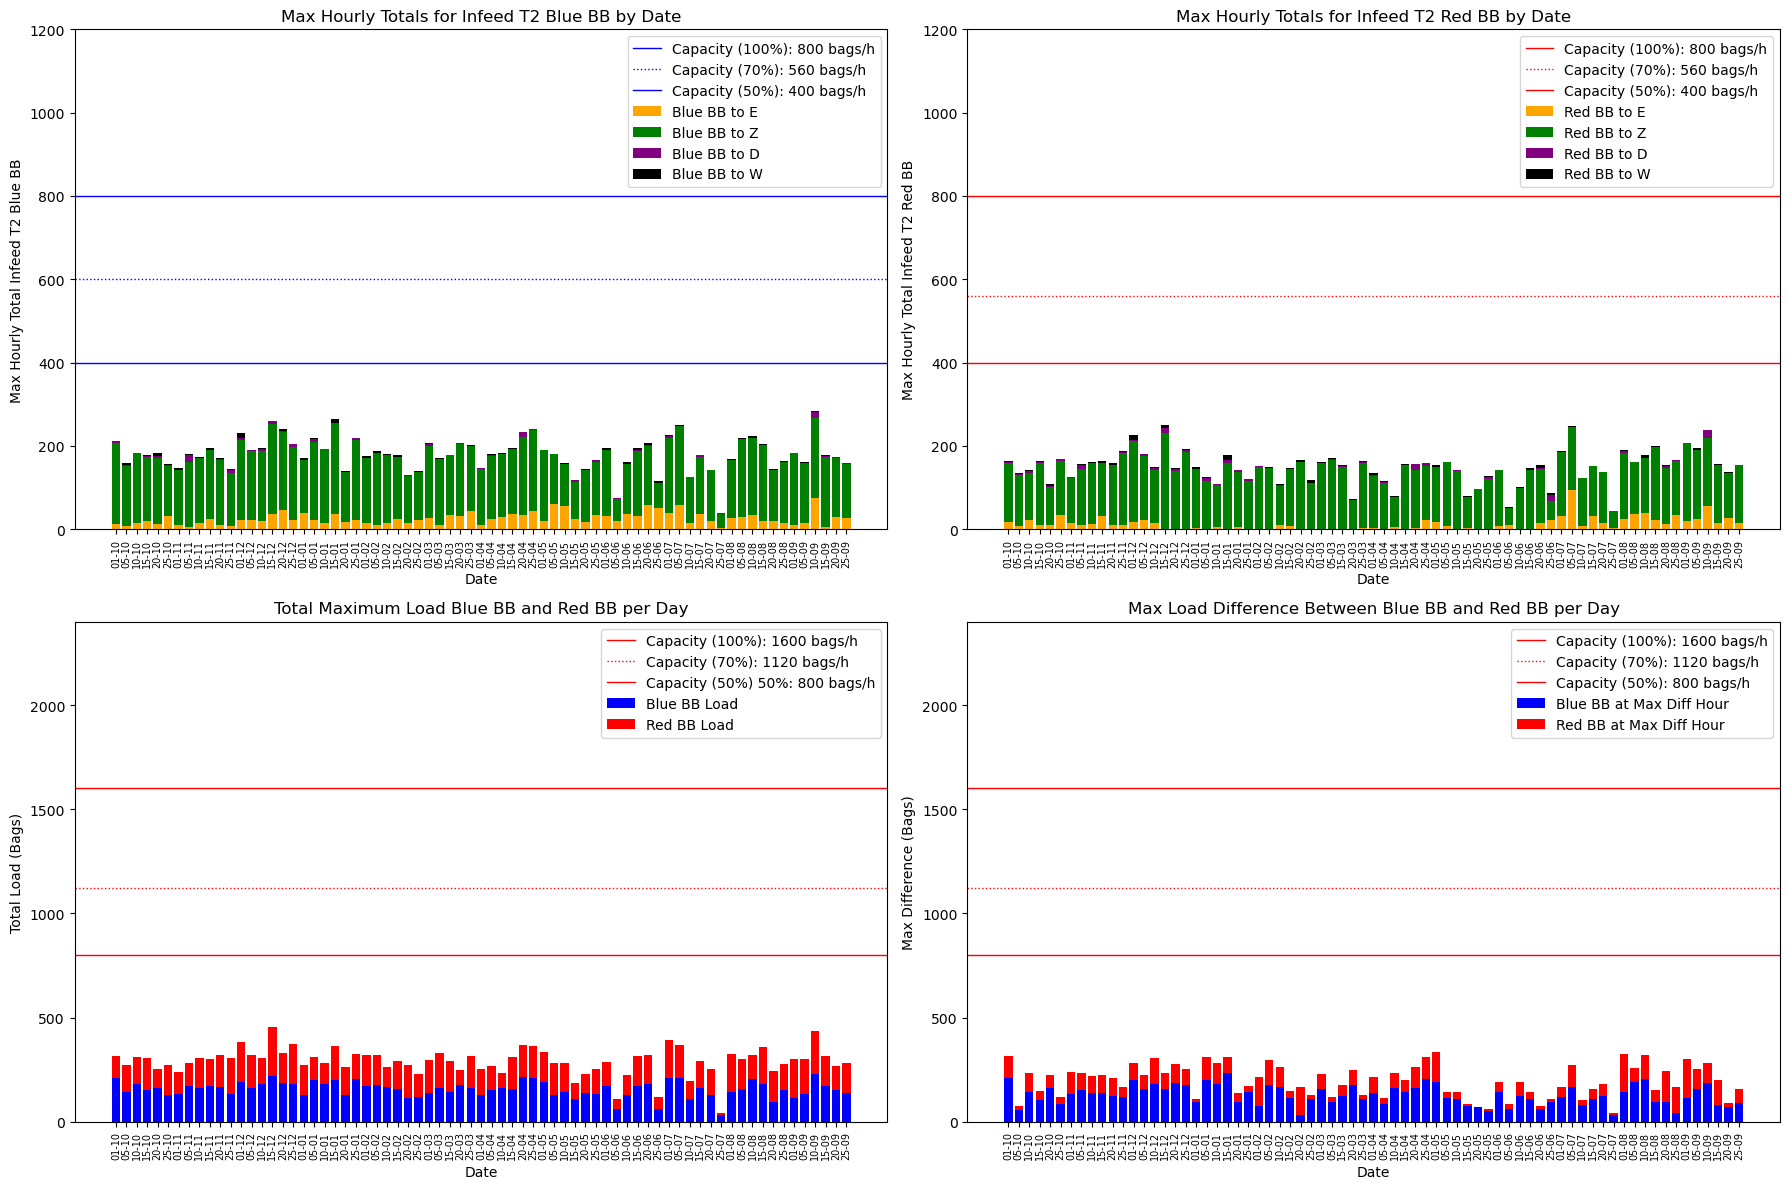

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Correctly assign the file path to the file_path variable
file_path = r"C:\\Users\\miche\\Downloads\\01-06 Load on BB.xlsx"

# Load all sheets from the Excel file
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Define Infeed_T2_Blue_BB and Infeed_T2_Red_BB columns
Infeed_T2_Blue_BB_columns = [
    'T2 via BB (10010) to Z', 'T2 via BB (10033) to Z',
    'T2 via BB (10034) to E', 'T2 via BB (10034) to Z',
    'T2 via BB (10630) to D', 'T2 via BB (10630) to E',
    'T2 via BB (10630) to W'
]

Infeed_T2_Red_BB_columns = [
    'T2 via BB (10011) to Z', 'T2 via BB (10640) to E',
    'T2 via BB (10008) to Z', 'T2 via BB (10640) to D',
    'T2 via BB (10640) to W'
]

# Dictionary to store max hourly totals for Infeed T2 Blue BB and Red BB
max_hourly_totals_infeed_t2_blue_dict = {}
max_hourly_totals_infeed_t2_red_dict = {}

# List to store the total maximum loads and differences for each day
total_max_loads_per_day = []
differences_per_day = []

# Process each sheet in the Excel file
for sheet_name, df in sheets_dict.items():
    # Handle missing columns for Blue BB
    for col in Infeed_T2_Blue_BB_columns:
        df[col] = df.get(col, 0)

    # Handle missing columns for Red BB
    for col in Infeed_T2_Red_BB_columns:
        df[col] = df.get(col, 0)

    # Process only the relevant columns for Blue BB and Red BB
    Blue_BB_df = df[Infeed_T2_Blue_BB_columns].copy()
    Red_BB_df = df[Infeed_T2_Red_BB_columns].copy()

    # Add 'Hour' column based on index (assuming 15-minute intervals)
    Blue_BB_df['Hour'] = (Blue_BB_df.index // 4) + 1
    Red_BB_df['Hour'] = (Red_BB_df.index // 4) + 1

    # Group by 'Hour' and sum the values in each column
    hourly_sums_blue = Blue_BB_df.groupby('Hour').sum()
    hourly_sums_red = Red_BB_df.groupby('Hour').sum()

    # Calculate total sum across all columns for each hour
    hourly_totals_blue = hourly_sums_blue.sum(axis=1)
    hourly_totals_red = hourly_sums_red.sum(axis=1)

    # Max Hourly Totals for Infeed T2 Blue BB and Red BB
    max_hourly_totals_infeed_t2_blue_dict[sheet_name] = hourly_totals_blue.max()
    max_hourly_totals_infeed_t2_red_dict[sheet_name] = hourly_totals_red.max()

    # Find the maximum combined total load for Blue BB and Red BB
    max_total_hour = (hourly_totals_blue + hourly_totals_red).idxmax()
    total_max_loads_per_day.append({
        'day': sheet_name,
        'max_total_load_blue': hourly_totals_blue.loc[max_total_hour],
        'max_total_load_red': hourly_totals_red.loc[max_total_hour],
        'max_total_hour': max_total_hour
    })

    # Calculate the absolute differences in hourly totals between Blue BB and Red BB
    hourly_total_diff = abs(hourly_totals_blue - hourly_totals_red)

    # Find the maximum difference and the hour at which it occurred
    max_diff = hourly_total_diff.max()
    max_diff_hour = hourly_total_diff.idxmax()

    # Store the differences for the day
    differences_per_day.append({
        'day': sheet_name,
        'max_difference': max_diff,
        'max_diff_hour': max_diff_hour,
        'load_blue_at_diff_hour': hourly_totals_blue.loc[max_diff_hour],
        'load_red_at_diff_hour': hourly_totals_red.loc[max_diff_hour]
    })

# Prepare data for plotting
sheet_names_infeed_t2_blue = list(max_hourly_totals_infeed_t2_blue_dict.keys())
sheet_names_infeed_t2_red = list(max_hourly_totals_infeed_t2_red_dict.keys())
days = [result['day'] for result in total_max_loads_per_day]
blue_loads = [result['max_total_load_blue'] for result in total_max_loads_per_day]
red_loads = [result['max_total_load_red'] for result in total_max_loads_per_day]
max_differences_blue = [result['load_blue_at_diff_hour'] for result in differences_per_day]
max_differences_red = [result['load_red_at_diff_hour'] for result in differences_per_day]

import matplotlib.pyplot as plt

# Define the y-axis multiplier
y_limit_multiplier = 1.5

# Prepare data for plotting
days = [result['day'] for result in total_max_loads_per_day]
blue_loads = [result['max_total_load_blue'] for result in total_max_loads_per_day]
red_loads = [result['max_total_load_red'] for result in total_max_loads_per_day]
max_differences_blue = [result['load_blue_at_diff_hour'] for result in differences_per_day]
max_differences_red = [result['load_red_at_diff_hour'] for result in differences_per_day]

# Set up a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Define columns by direction for T2 Blue BB and Red BB
blue_columns_by_direction_t2 = {
    'E': ['T2 via BB (10034) to E', 'T2 via BB (10630) to E'],
    'Z': ['T2 via BB (10010) to Z', 'T2 via BB (10033) to Z', 'T2 via BB (10034) to Z'],
    'D': ['T2 via BB (10630) to D'],
    'W': ['T2 via BB (10630) to W']
}

red_columns_by_direction_t2 = {
    'E': ['T2 via BB (10640) to E'],
    'Z': ['T2 via BB (10008) to Z', 'T2 via BB (10011) to Z', 'TSD via BB (10640) to Z'],
    'D': ['T2 via BB (10640) to D'],
    'W': ['T2 via BB (10640) to W']
}

# Colors for each direction
direction_colors_t2 = {
    'E': 'orange',
    'Z': 'green',
    'D': 'purple',
    'W': 'black'
}

# Plot 1: Max Hourly Totals for Infeed T2 Blue BB by Date (Stacked by Direction)
bottom = None
for direction, columns in blue_columns_by_direction_t2.items():
    sums_for_direction = [sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max() for sheet_name in sheet_names_infeed_t2_blue]
    if bottom is None:
        axs[0, 0].bar(sheet_names_infeed_t2_blue, sums_for_direction, color=direction_colors_t2[direction], label=f'Blue BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 0].bar(sheet_names_infeed_t2_blue, sums_for_direction, bottom=bottom, color=direction_colors_t2[direction], label=f'Blue BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

axs[0, 0].set_ylim(0, 800 * y_limit_multiplier)
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Max Hourly Total Infeed T2 Blue BB')
axs[0, 0].set_title('Max Hourly Totals for Infeed T2 Blue BB by Date')
axs[0, 0].axhline(y=800, color='b', linestyle='-', linewidth=1, label='Capacity (100%): 800 bags/h')
axs[0, 0].axhline(y=800 * 0.75, color='b', linestyle=':', linewidth=1, label='Capacity (70%): 560 bags/h')
axs[0, 0].axhline(y=800 * 0.5, color='b', linestyle='-', linewidth=1, label='Capacity (50%): 400 bags/h')
axs[0, 0].tick_params(axis='x', rotation=90, labelsize=7)
axs[0, 0].legend(loc='upper right')

# Plot 2: Max Hourly Totals for Infeed T2 Red BB by Date (Stacked by Direction)
bottom = None
for direction, columns in red_columns_by_direction_t2.items():
    sums_for_direction = [sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max() for sheet_name in sheet_names_infeed_t2_red]
    if bottom is None:
        axs[0, 1].bar(sheet_names_infeed_t2_red, sums_for_direction, color=direction_colors_t2[direction], label=f'Red BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 1].bar(sheet_names_infeed_t2_red, sums_for_direction, bottom=bottom, color=direction_colors_t2[direction], label=f'Red BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

axs[0, 1].set_ylim(0, 800 * y_limit_multiplier)
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Max Hourly Total Infeed T2 Red BB')
axs[0, 1].set_title('Max Hourly Totals for Infeed T2 Red BB by Date')
axs[0, 1].axhline(y=800, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 800 bags/h')
axs[0, 1].axhline(y=800 * 0.70, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 560 bags/h')
axs[0, 1].axhline(y=800 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 400 bags/h')
axs[0, 1].tick_params(axis='x', rotation=90, labelsize=7)
axs[0, 1].legend(loc='upper right')

# Plot 3: Total Maximum Load (Blue BB and Red BB) per Day
axs[1, 0].bar(days, blue_loads, label='Blue BB Load', color='blue')
axs[1, 0].bar(days, red_loads, bottom=blue_loads, label='Red BB Load', color='red')
axs[1, 0].set_ylim(0, 1600 * y_limit_multiplier)
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Total Load (Bags)')
axs[1, 0].set_title('Total Maximum Load Blue BB and Red BB per Day')
axs[1, 0].axhline(y=800 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1600 bags/h')
axs[1, 0].axhline(y=800 * 0.70 * 2, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 1120 bags/h')
axs[1, 0].axhline(y=800 * 0.5 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (50%) 50%: 800 bags/h')
axs[1, 0].tick_params(axis='x', rotation=90, labelsize=7)
axs[1, 0].legend(loc='upper right')

# Plot 4: Max Load Difference Between Blue BB and Red BB per Day
axs[1, 1].bar(days, max_differences_blue, label='Blue BB at Max Diff Hour', color='blue')
axs[1, 1].bar(days, max_differences_red, bottom=max_differences_blue, label='Red BB at Max Diff Hour', color='red')
axs[1, 1].set_ylim(0, 1600 * y_limit_multiplier)
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Max Difference (Bags)')
axs[1, 1].set_title('Max Load Difference Between Blue BB and Red BB per Day')
axs[1, 1].axhline(y=800 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1600 bags/h')
axs[1, 1].axhline(y=800 * 0.70 * 2, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 1120 bags/h')
axs[1, 1].axhline(y=800 * 0.5 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 800 bags/h')
axs[1, 1].tick_params(axis='x', rotation=90, labelsize=7)
axs[1, 1].legend(loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
output_path = f"C:\\Users\\miche\\Downloads\\T2 infeed figure.png"  # Update the path as needed
plt.savefig(output_path, format='png', dpi=300)  # Save as PNG with high resolution
plt.show()



# Infeed South 

NameError: name 'sheet_names_infeed_z_blue' is not defined

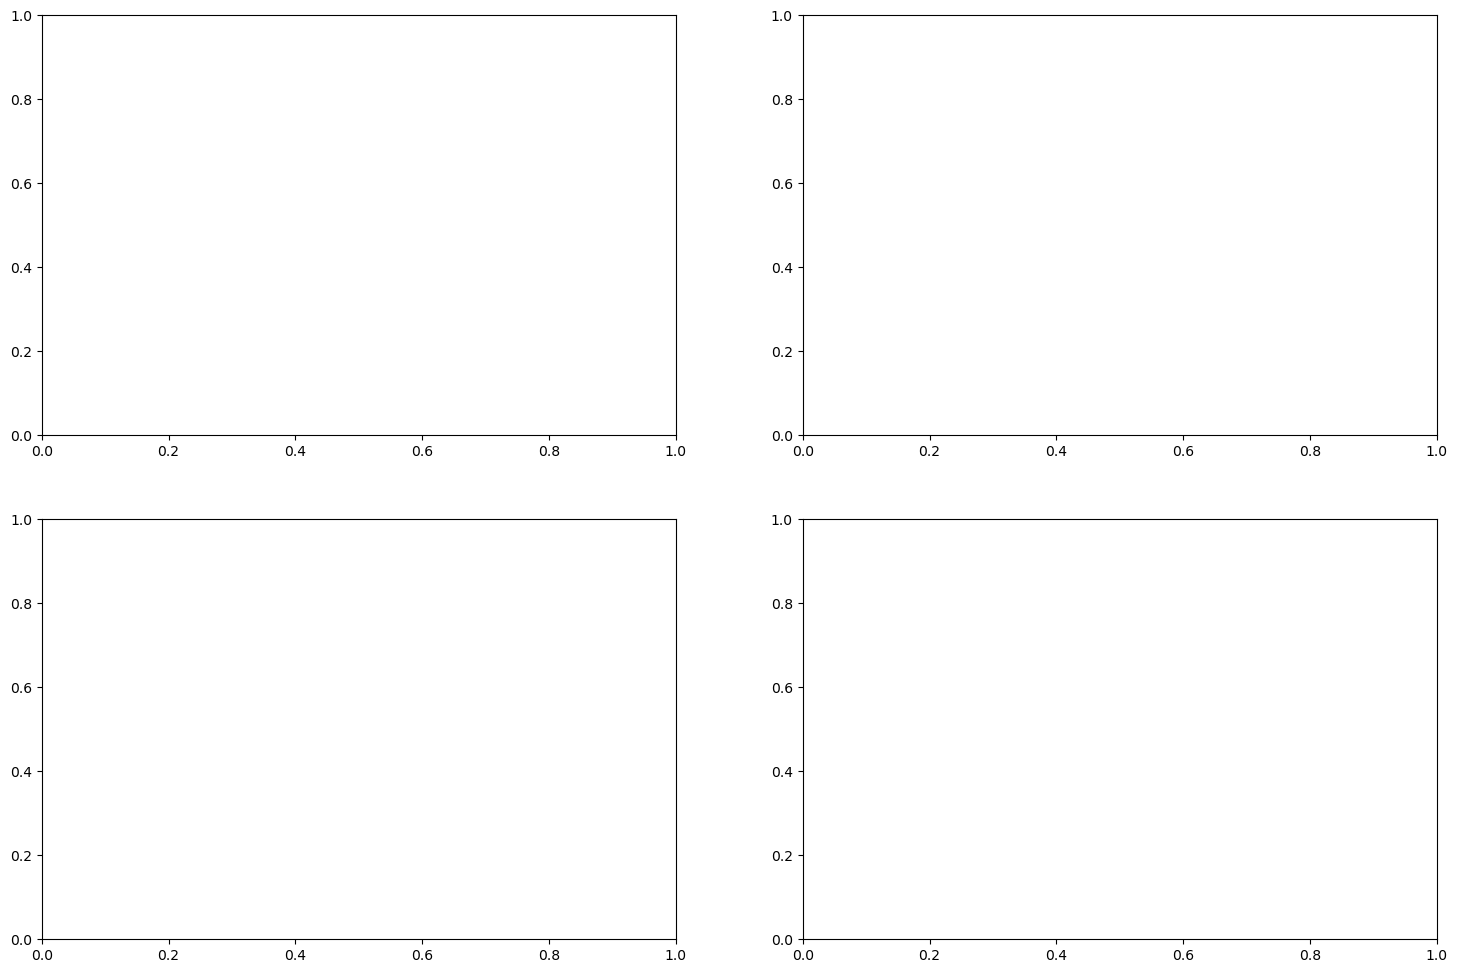

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Correctly assign the file path to the file_path variable
file_path = r"C:\\Users\\miche\\Downloads\\01-06 Load on BB.xlsx"

# Load all sheets from the Excel file
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Define Infeed_Z_Blue_BB and Infeed_Z_Red_BB columns
Infeed_Z_Blue_BB_columns = [
    'Z via BB (10630) to D', 'Z via BB (10630) to E',
    'Z via BB (10630) to W', 'Z via BB (10009) to D'
]

Infeed_Z_Red_BB_columns = [
    'Z via BB (10640) to D', 'Z via BB (10640) to E',
    'Z via BB (10640) to W'
]

# Define the columns by direction for Z hall (Blue and Red BB)
blue_columns_by_direction_z = {
    'E': ['Z via BB (10630) to E'],
    'Z': ['Z via BB (10009) to D', 'Z via BB (10630) to D', 'Z via BB (10630) to W'],
    'W': ['Z via BB (10630) to W']
}

red_columns_by_direction_z = {
    'E': ['Z via BB (10640) to E'],
    'Z': ['Z via BB (10640) to D', 'Z via BB (10640) to W']
}

# Colors for each direction
direction_colors_z = {
    'E': 'orange',
    'Z': 'green',
    'W': 'black'
}

# Dictionary to store max hourly totals for Infeed Z Blue BB and Red BB
max_hourly_totals_infeed_z_blue_dict = {}
max_hourly_totals_infeed_z_red_dict = {}

# List to store the total maximum loads and differences for each day
total_max_loads_per_day = []
differences_per_day = []

# Process each sheet in the Excel file
for sheet_name, df in sheets_dict.items():
    # Handle missing columns for Blue BB
    for col in Infeed_Z_Blue_BB_columns:
        df[col] = df.get(col, 0)

    # Handle missing columns for Red BB
    for col in Infeed_Z_Red_BB_columns:
        df[col] = df.get(col, 0)

    # Process only the relevant columns for Blue BB and Red BB
    Blue_BB_df = df[Infeed_Z_Blue_BB_columns].copy()
    Red_BB_df = df[Infeed_Z_Red_BB_columns].copy()

    # Add 'Hour' column based on index (assuming 15-minute intervals)
    Blue_BB_df['Hour'] = (Blue_BB_df.index // 4) + 1
    Red_BB_df['Hour'] = (Red_BB_df.index // 4) + 1

    # Group by 'Hour' and sum the values in each column
    hourly_sums_blue = Blue_BB_df.groupby('Hour').sum()
    hourly_sums_red = Red_BB_df.groupby('Hour').sum()

    # Calculate total sum across all columns for each hour
    hourly_totals_blue = hourly_sums_blue.sum(axis=1)
    hourly_totals_red = hourly_sums_red.sum(axis=1)

    # Max Hourly Totals for Infeed Z Blue BB and Red BB
    max_hourly_totals_infeed_z_blue_dict[sheet_name] = hourly_totals_blue.max()
    max_hourly_totals_infeed_z_red_dict[sheet_name] = hourly_totals_red.max()

    # Find the maximum combined total load for Blue BB and Red BB
    max_total_hour = (hourly_totals_blue + hourly_totals_red).idxmax()
    total_max_loads_per_day.append({
        'day': sheet_name,
        'max_total_load_blue': hourly_totals_blue.loc[max_total_hour],
        'max_total_load_red': hourly_totals_red.loc[max_total_hour],
        'max_total_hour': max_total_hour
    })

    # Calculate the absolute differences in hourly totals between Blue BB and Red BB
    hourly_total_diff = abs(hourly_totals_blue - hourly_totals_red)

    # Find the maximum difference and the hour at which it occurred
    max_diff = hourly_total_diff.max()
    max_diff_hour = hourly_total_diff.idxmax()

    # Store the differences for the day
    differences_per_day.append({
        'day': sheet_name,
        'max_difference': max_diff,
        'max_diff_hour': max_diff_hour,
        'load_blue_at_diff_hour': hourly_totals_blue.loc[max_diff_hour],
        'load_red_at_diff_hour': hourly_totals_red.loc[max_diff_hour]
    })


# Define the y-axis multiplier
y_limit_multiplier = 1.5

# Prepare data for plotting
days = [result['day'] for result in total_max_loads_per_day]
blue_loads = [result['max_total_load_blue'] for result in total_max_loads_per_day]
red_loads = [result['max_total_load_red'] for result in total_max_loads_per_day]
max_differences_blue = [result['load_blue_at_diff_hour'] for result in differences_per_day]
max_differences_red = [result['load_red_at_diff_hour'] for result in differences_per_day]

# Subplot setup with 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# First subplot: Max Hourly Totals for Infeed Z Blue BB by Date (Stacked by Direction)
bottom = None
for direction, columns in blue_columns_by_direction_z.items():
    sums_for_direction = [sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max() for sheet_name in sheet_names_infeed_z_blue]
    if bottom is None:
        axs[0, 0].bar(sheet_names_infeed_z_blue, sums_for_direction, color=direction_colors_z[direction], label=f'Blue BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 0].bar(sheet_names_infeed_z_blue, sums_for_direction, bottom=bottom, color=direction_colors_z[direction], label=f'Blue BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

axs[0, 0].set_ylim(0, 1600 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Max Hourly Total Infeed Z Blue BB')
axs[0, 0].set_title('Max Hourly Totals for Infeed Z Blue BB by Date (Stacked by Direction)', color ='b')
axs[0, 0].axhline(y=1600, color='b', linestyle='-', linewidth=1, label='Capacity (100%): 1600 bags/h')
axs[0, 0].axhline(y=1600 * 0.7, color='b', linestyle=':', linewidth=1, label='Capacity (70%): 1120 bags/h')
axs[0, 0].axhline(y=1600 * 0.5, color='b', linestyle='-', linewidth=1, label='Capacity (50%): 800 bags/h')
axs[0, 0].tick_params(axis='x', rotation=90, labelsize=7)
axs[0, 0].legend(loc='upper right')

# Second subplot: Max Hourly Totals for Infeed Z Red BB by Date (Stacked by Direction)
bottom = None
for direction, columns in red_columns_by_direction_z.items():
    sums_for_direction = [sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max() for sheet_name in sheet_names_infeed_z_red]
    if bottom is None:
        axs[0, 1].bar(sheet_names_infeed_z_red, sums_for_direction, color=direction_colors_z[direction], label=f'Red BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 1].bar(sheet_names_infeed_z_red, sums_for_direction, bottom=bottom, color=direction_colors_z[direction], label=f'Red BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

axs[0, 1].set_ylim(0, 1600 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Max Hourly Total Infeed Z Red BB')
axs[0, 1].set_title('Max Hourly Totals for Infeed Z Red BB by Date (Stacked by Direction)', color='r')
axs[0, 1].axhline(y=1600, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1600 bags/h')
axs[0, 1].axhline(y=1600 * 0.7, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 1120 bags/h')
axs[0, 1].axhline(y=1600 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 800 bags/h')
axs[0, 1].tick_params(axis='x', rotation=90, labelsize=7)
axs[0, 1].legend(loc='upper right')

# Third subplot: Total Maximum Load (Blue BB and Red BB) per Day
axs[1, 0].bar(days, blue_loads, label='Blue BB Load', color='blue')
axs[1, 0].bar(days, red_loads, bottom=blue_loads, label='Red BB Load', color='red')
axs[1, 0].set_ylim(0, 3200 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[1, 0].set_xlabel('Day')
axs[1, 0].set_ylabel('Total Load (Bags)')
axs[1, 0].set_title('Total Maximum Load Blue BB and Red BB per Day (Same peak-hour)')
axs[1, 0].axhline(y=3200, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 3200 bags/h')
axs[1, 0].axhline(y=3200 * 0.7, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 2240 bags/h')
axs[1, 0].axhline(y=3200 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 1600 bags/h')
axs[1, 0].tick_params(axis='x', rotation=90, labelsize=7)
axs[1, 0].legend()

# Fourth subplot: Stacked Max Load Difference Between Blue BB and Red BB with ratios
axs[1, 1].bar(days, max_differences_blue, label='Blue BB at Max Diff Hour', color='blue')
axs[1, 1].bar(days, max_differences_red, bottom=max_differences_blue, label='Red BB at Max Diff Hour', color='red')
axs[1, 1].set_ylim(0, 3200 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[1, 1].set_xlabel('Day')
axs[1, 1].set_ylabel('Max Difference (Bags)')
axs[1, 1].set_title('Max Load Difference Between Blue BB and Red BB per Day (Same peak-hour)')
axs[1, 1].axhline(y=3200, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 3200 bags/h')
axs[1, 1].axhline(y=3200 * 0.7, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 2240 bags/h')
axs[1, 1].axhline(y=3200 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 1600 bags/h')
axs[1, 1].tick_params(axis='x', rotation=90,sheet_names_infeed_z_blue labelsize=7)
axs[1, 1].legend(loc='upper right')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


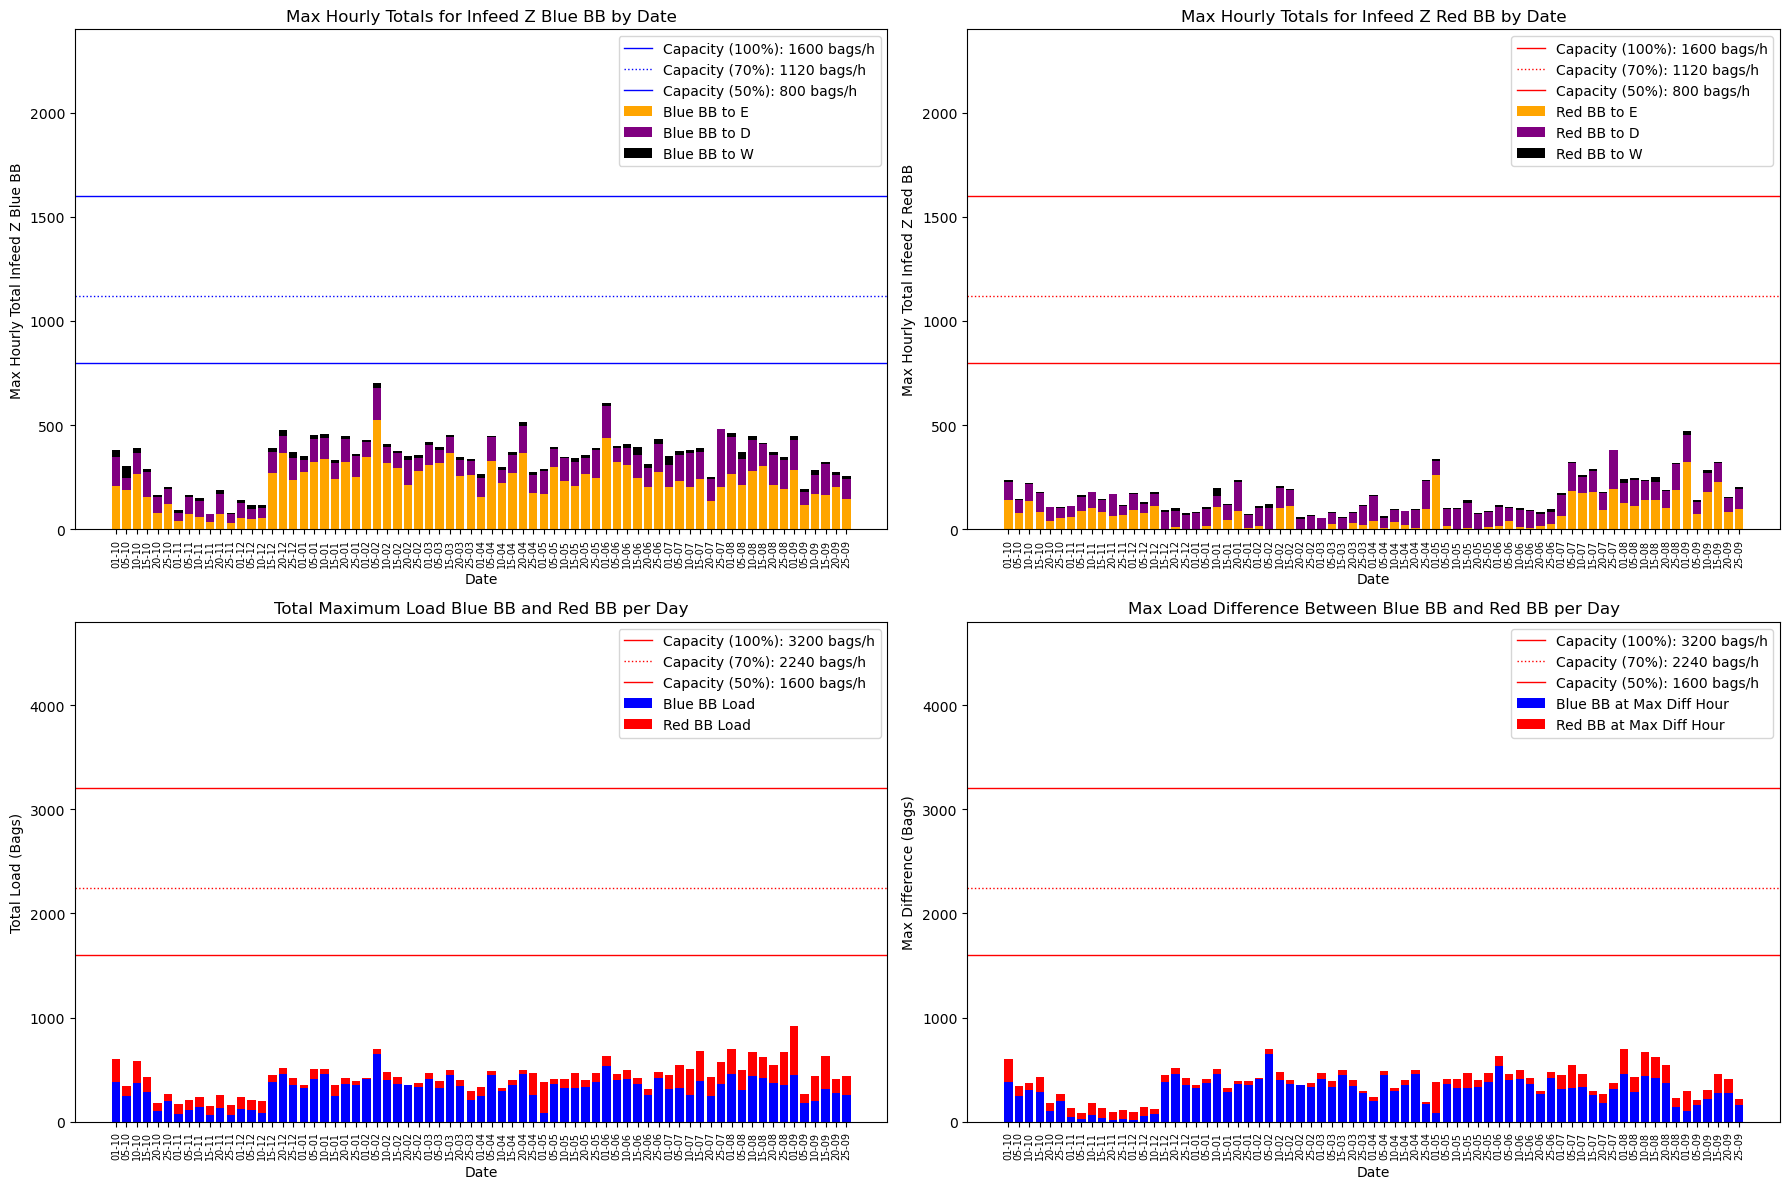

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Correctly assign the file path to the file_path variable
file_path = r"C:\\Users\\miche\\Downloads\\01-06 Load on BB.xlsx"

# Load all sheets from the Excel file
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Define Infeed_Z_Blue_BB and Infeed_Z_Red_BB columns
Infeed_Z_Blue_BB_columns = [
    'Z via BB (10630) to D', 'Z via BB (10630) to E',
    'Z via BB (10630) to W', 'Z via BB (10009) to D'
]

Infeed_Z_Red_BB_columns = [
    'Z via BB (10640) to D', 'Z via BB (10640) to E',
    'Z via BB (10640) to W'
]

# Dictionary to store max hourly totals for Infeed Z Blue BB and Red BB
max_hourly_totals_infeed_z_blue_dict = {}
max_hourly_totals_infeed_z_red_dict = {}

# List to store the total maximum loads and differences for each day
total_max_loads_per_day = []
differences_per_day = []

# Process each sheet in the Excel file
for sheet_name, df in sheets_dict.items():
    # Handle missing columns for Blue BB
    for col in Infeed_Z_Blue_BB_columns:
        df[col] = df.get(col, 0)

    # Handle missing columns for Red BB
    for col in Infeed_Z_Red_BB_columns:
        df[col] = df.get(col, 0)

    # Process only the relevant columns for Blue BB and Red BB
    Blue_BB_df = df[Infeed_Z_Blue_BB_columns].copy()
    Red_BB_df = df[Infeed_Z_Red_BB_columns].copy()

    # Add 'Hour' column based on index (assuming 15-minute intervals)
    Blue_BB_df['Hour'] = (Blue_BB_df.index // 4) + 1
    Red_BB_df['Hour'] = (Red_BB_df.index // 4) + 1

    # Group by 'Hour' and sum the values in each column
    hourly_sums_blue = Blue_BB_df.groupby('Hour').sum()
    hourly_sums_red = Red_BB_df.groupby('Hour').sum()

    # Calculate total sum across all columns for each hour
    hourly_totals_blue = hourly_sums_blue.sum(axis=1)
    hourly_totals_red = hourly_sums_red.sum(axis=1)

    # Max Hourly Totals for Infeed Z Blue BB and Red BB
    max_hourly_totals_infeed_z_blue_dict[sheet_name] = hourly_totals_blue.max()
    max_hourly_totals_infeed_z_red_dict[sheet_name] = hourly_totals_red.max()

    # Find the maximum combined total load for Blue BB and Red BB
    max_total_hour = (hourly_totals_blue + hourly_totals_red).idxmax()
    total_max_loads_per_day.append({
        'day': sheet_name,
        'max_total_load_blue': hourly_totals_blue.loc[max_total_hour],
        'max_total_load_red': hourly_totals_red.loc[max_total_hour],
        'max_total_hour': max_total_hour
    })

    # Calculate the absolute differences in hourly totals between Blue BB and Red BB
    hourly_total_diff = abs(hourly_totals_blue - hourly_totals_red)

    # Find the maximum difference and the hour at which it occurred
    max_diff = hourly_total_diff.max()
    max_diff_hour = hourly_total_diff.idxmax()

    # Store the differences for the day
    differences_per_day.append({
        'day': sheet_name,
        'max_difference': max_diff,
        'max_diff_hour': max_diff_hour,
        'load_blue_at_diff_hour': hourly_totals_blue.loc[max_diff_hour],
        'load_red_at_diff_hour': hourly_totals_red.loc[max_diff_hour]
    })

# Prepare data for plotting
sheet_names_infeed_z_blue = list(max_hourly_totals_infeed_z_blue_dict.keys())
sheet_names_infeed_z_red = list(max_hourly_totals_infeed_z_red_dict.keys())
days = [result['day'] for result in total_max_loads_per_day]
blue_loads = [result['max_total_load_blue'] for result in total_max_loads_per_day]
red_loads = [result['max_total_load_red'] for result in total_max_loads_per_day]
max_differences_blue = [result['load_blue_at_diff_hour'] for result in differences_per_day]
max_differences_red = [result['load_red_at_diff_hour'] for result in differences_per_day]

# Define columns by direction for Z Blue BB and Red BB
blue_columns_by_direction_z = {
    'E': ['Z via BB (10630) to E'],
    'D': ['Z via BB (10630) to D', 'Z via BB (10009) to D'],
    'W': ['Z via BB (10630) to W']
}

red_columns_by_direction_z = {
    'E': ['Z via BB (10640) to E'],
    'D': ['Z via BB (10640) to D'],
    'W': ['Z via BB (10640) to W']
}

# Colors for each direction
direction_colors_z = {
    'E': 'orange',
    'D': 'purple',
    'W': 'black'
}

# Set up a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Max Hourly Totals for Infeed Z Blue BB by Date (Stacked by Direction)
bottom = None
for direction, columns in blue_columns_by_direction_z.items():
    sums_for_direction = [sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max() for sheet_name in sheet_names_infeed_z_blue]
    if bottom is None:
        axs[0, 0].bar(sheet_names_infeed_z_blue, sums_for_direction, color=direction_colors_z[direction], label=f'Blue BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 0].bar(sheet_names_infeed_z_blue, sums_for_direction, bottom=bottom, color=direction_colors_z[direction], label=f'Blue BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

axs[0, 0].set_ylim(0, 1600 * 1.5)
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Max Hourly Total Infeed Z Blue BB')
axs[0, 0].set_title('Max Hourly Totals for Infeed Z Blue BB by Date')
axs[0, 0].axhline(y=1600, color='b', linestyle='-', linewidth=1, label='Capacity (100%): 1600 bags/h')
axs[0, 0].axhline(y=1600 * 0.7, color='b', linestyle=':', linewidth=1, label='Capacity (70%): 1120 bags/h')
axs[0, 0].axhline(y=1600 * 0.5, color='b', linestyle='-', linewidth=1, label='Capacity (50%): 800 bags/h')
axs[0, 0].tick_params(axis='x', rotation=90, labelsize=7)
axs[0, 0].legend(loc='upper right')

# Plot 2: Max Hourly Totals for Infeed Z Red BB by Date (Stacked by Direction)
bottom = None
for direction, columns in red_columns_by_direction_z.items():
    sums_for_direction = [sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max() for sheet_name in sheet_names_infeed_z_red]
    if bottom is None:
        axs[0, 1].bar(sheet_names_infeed_z_red, sums_for_direction, color=direction_colors_z[direction], label=f'Red BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 1].bar(sheet_names_infeed_z_red, sums_for_direction, bottom=bottom, color=direction_colors_z[direction], label=f'Red BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

axs[0, 1].set_ylim(0, 1600 * 1.5)
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Max Hourly Total Infeed Z Red BB')
axs[0, 1].set_title('Max Hourly Totals for Infeed Z Red BB by Date')
axs[0, 1].axhline(y=1600, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1600 bags/h')
axs[0, 1].axhline(y=1600 * 0.7, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 1120 bags/h')
axs[0, 1].axhline(y=1600 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 800 bags/h')
axs[0, 1].tick_params(axis='x', rotation=90, labelsize=7)
axs[0, 1].legend(loc='upper right')

# Plot 3: Total Maximum Load (Blue BB and Red BB) per Day
axs[1, 0].bar(days, blue_loads, label='Blue BB Load', color='blue')
axs[1, 0].bar(days, red_loads, bottom=blue_loads, label='Red BB Load', color='red')
axs[1, 0].set_ylim(0, 3200 * 1.5)
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Total Load (Bags)')
axs[1, 0].set_title('Total Maximum Load Blue BB and Red BB per Day')
axs[1, 0].axhline(y=3200, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 3200 bags/h')
axs[1, 0].axhline(y=3200 * 0.7, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 2240 bags/h')
axs[1, 0].axhline(y=3200 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 1600 bags/h')
axs[1, 0].tick_params(axis='x', rotation=90, labelsize=7)
axs[1, 0].legend(loc='upper right')

# Plot 4: Max Load Difference Between Blue BB and Red BB per Day
axs[1, 1].bar(days, max_differences_blue, label='Blue BB at Max Diff Hour', color='blue')
axs[1, 1].bar(days, max_differences_red, bottom=max_differences_blue, label='Red BB at Max Diff Hour', color='red')
axs[1, 1].set_ylim(0, 3200 * 1.5)
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Max Difference (Bags)')
axs[1, 1].set_title('Max Load Difference Between Blue BB and Red BB per Day')
axs[1, 1].axhline(y=3200, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 3200 bags/h')
axs[1, 1].axhline(y=3200 * 0.7, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 2240 bags/h')
axs[1, 1].axhline(y=3200 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 1600 bags/h')
axs[1, 1].tick_params(axis='x', rotation=90, labelsize=7)
axs[1, 1].legend(loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
output_path = f"C:\\Users\\miche\\Downloads\\Z_infeed_figure.png"  # Update the path as needed
plt.savefig(output_path, format='png', dpi=300)  # Save as PNG with high resolution
plt.show()


# Infeed E-pier

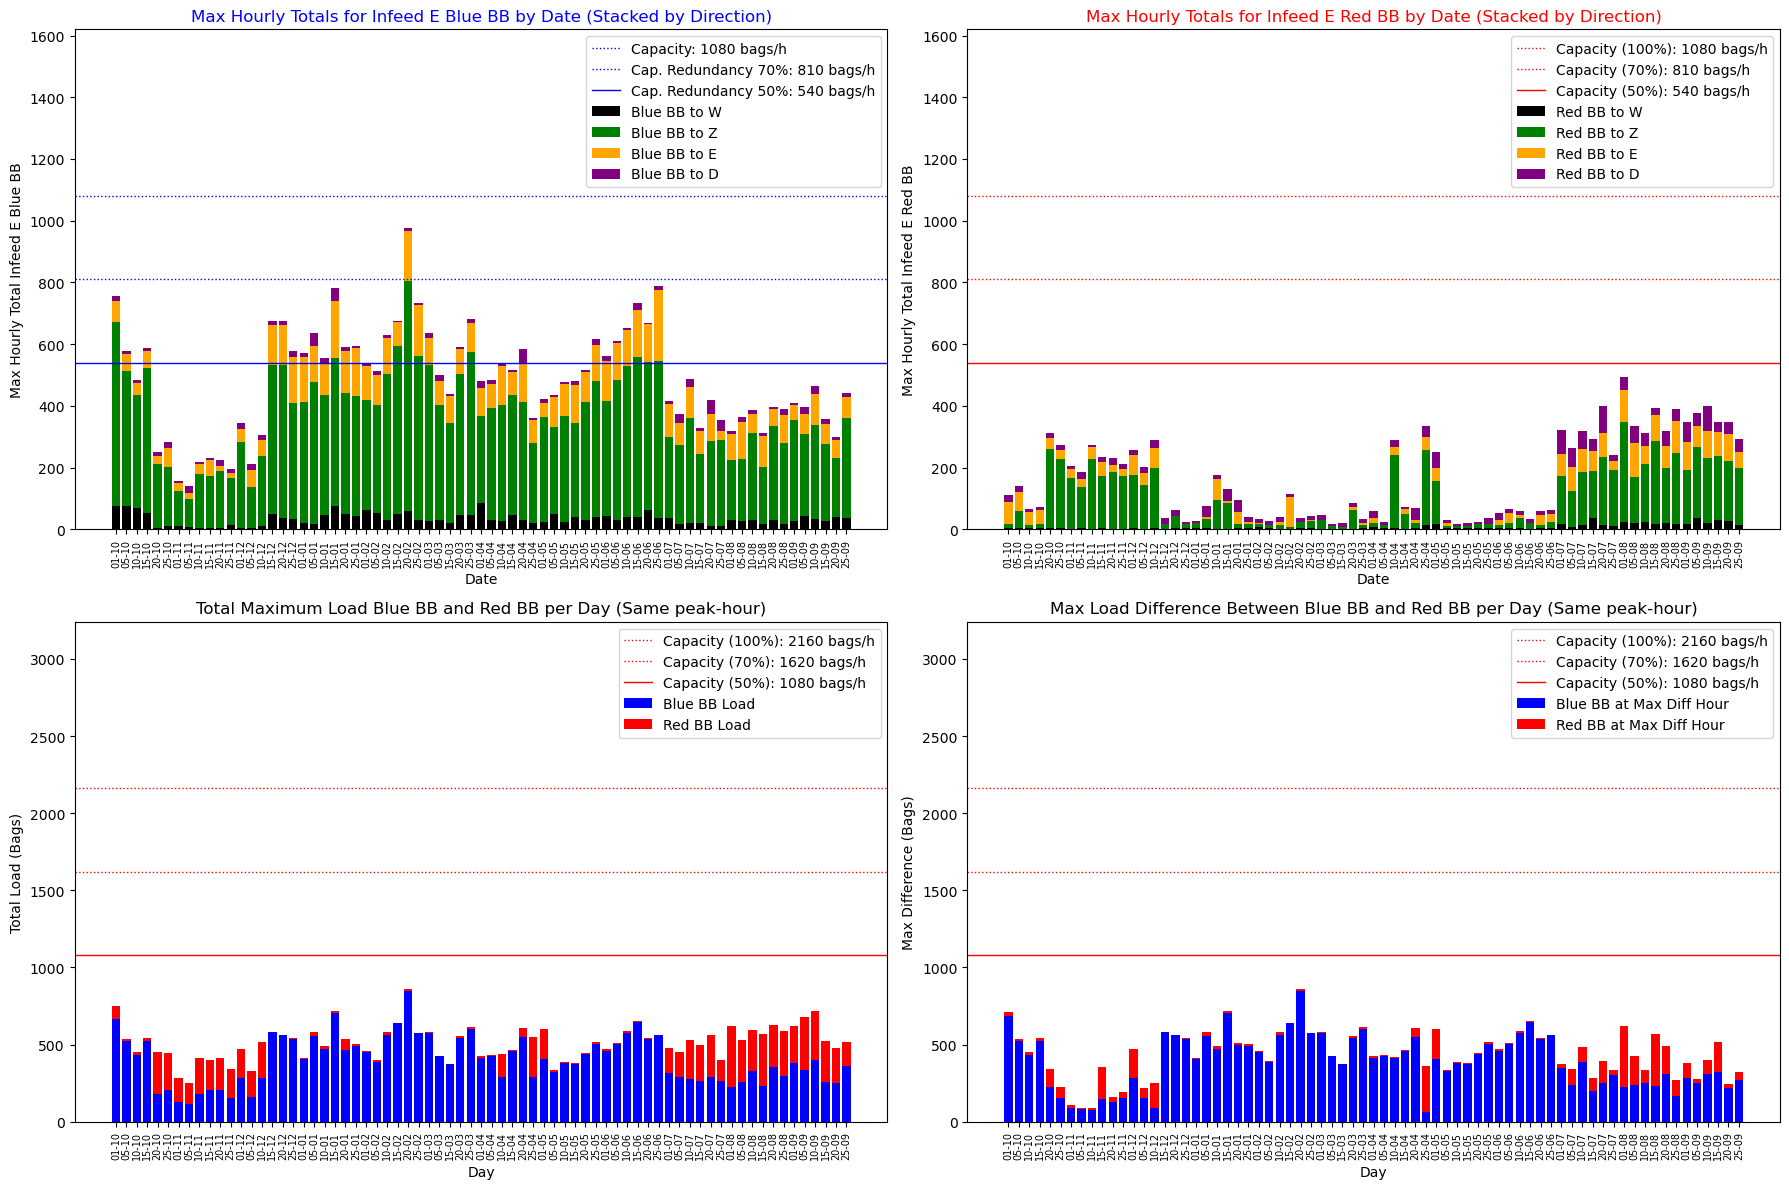

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Correctly assign the file path to the file_path variable
file_path = r"C:\\Users\\miche\\Downloads\\01-06 Load on BB.xlsx"

# Load all sheets from the Excel file
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Define Infeed_E_Blue_BB and Infeed_E_Red_BB columns
Infeed_E_Blue_BB_columns = [
    'C via BB (10033) to W', 'C via BB (10033) to Z', 'C via BB (10034) to Z',
    'C via BB (10630) to E', 'C via BB (10630) to D', 'C via BB (10630) to W',
    'C via BB (10630) to Z', 'UQE via BB (10630) to D', 'UQE via BB (10630) to E',
    'UQE via BB (10630) to Z', 'UQE via BB (10630) to W', 'UQE via BB (10033) to W',
    'UQE via BB (10033) to Z', 'UQE via BB (10033) to E', 'UQE via BB (10034) to W',
    'UQE via BB (10034) to Z', 'UQE via BB (10009) to D', 'UQE via BB (10009) to Z'
]

Infeed_E_Red_BB_columns = [
    'UQE via BB (10640) to D', 'UQE via BB (10640) to E', 'UQE via BB (10640) to Z',
    'UQE via BB (10008) to D', 'UQE via BB (10008) to Z', 'UQE via BB (10035) to D',
    'UQE via BB (10035) to W', 'UQE via BB (10035) to Z', 'C via BB (10640) to E',
    'C via BB (10008) to Z', 'C via BB (10640) to D', 'C via BB (10640) to W',
    'C via BB (10640) to Z'
]

# Dictionary to store max hourly totals for Infeed E Blue BB and Red BB
max_hourly_totals_infeed_e_blue_dict = {}
max_hourly_totals_infeed_e_red_dict = {}

# List to store the total maximum loads and differences for each day
total_max_loads_per_day = []
differences_per_day = []

# Process each sheet in the Excel file
for sheet_name, df in sheets_dict.items():
    # Handle missing columns for Blue BB
    for col in Infeed_E_Blue_BB_columns:
        df[col] = df.get(col, 0)

    # Handle missing columns for Red BB
    for col in Infeed_E_Red_BB_columns:
        df[col] = df.get(col, 0)

    # Process only the relevant columns for Blue BB and Red BB
    Blue_BB_df = df[Infeed_E_Blue_BB_columns].copy()
    Red_BB_df = df[Infeed_E_Red_BB_columns].copy()

    # Add 'Hour' column based on index (assuming 15-minute intervals)
    Blue_BB_df['Hour'] = (Blue_BB_df.index // 4) + 1
    Red_BB_df['Hour'] = (Red_BB_df.index // 4) + 1

    # Group by 'Hour' and sum the values in each column
    hourly_sums_blue = Blue_BB_df.groupby('Hour').sum()
    hourly_sums_red = Red_BB_df.groupby('Hour').sum()

    # Calculate total sum across all columns for each hour
    hourly_totals_blue = hourly_sums_blue.sum(axis=1)
    hourly_totals_red = hourly_sums_red.sum(axis=1)

    # Max Hourly Totals for Infeed E Blue BB and Red BB
    max_hourly_totals_infeed_e_blue_dict[sheet_name] = hourly_totals_blue.max()
    max_hourly_totals_infeed_e_red_dict[sheet_name] = hourly_totals_red.max()

    # Find the maximum combined total load for Blue BB and Red BB
    max_total_hour = (hourly_totals_blue + hourly_totals_red).idxmax()
    total_max_loads_per_day.append({
        'day': sheet_name,
        'max_total_load_blue': hourly_totals_blue.loc[max_total_hour],
        'max_total_load_red': hourly_totals_red.loc[max_total_hour],
        'max_total_hour': max_total_hour
    })

    # Calculate the absolute differences in hourly totals between Blue BB and Red BB
    hourly_total_diff = abs(hourly_totals_blue - hourly_totals_red)

    # Find the maximum difference and the hour at which it occurred
    max_diff = hourly_total_diff.max()
    max_diff_hour = hourly_total_diff.idxmax()

    # Store the differences for the day
    differences_per_day.append({
        'day': sheet_name,
        'max_difference': max_diff,
        'max_diff_hour': max_diff_hour,
        'load_blue_at_diff_hour': hourly_totals_blue.loc[max_diff_hour],
        'load_red_at_diff_hour': hourly_totals_red.loc[max_diff_hour]
    })

# Prepare data for plotting
sheet_names_infeed_e_blue = list(max_hourly_totals_infeed_e_blue_dict.keys())
sheet_names_infeed_e_red = list(max_hourly_totals_infeed_e_red_dict.keys())
days = [result['day'] for result in total_max_loads_per_day]
blue_loads = [result['max_total_load_blue'] for result in total_max_loads_per_day]
red_loads = [result['max_total_load_red'] for result in total_max_loads_per_day]
max_differences_blue = [result['load_blue_at_diff_hour'] for result in differences_per_day]
max_differences_red = [result['load_red_at_diff_hour'] for result in differences_per_day]


# Define the columns by direction for E-pier (Blue and Red BB)
blue_columns_by_direction_e = {
    'W': ['C via BB (10033) to W', 'C via BB (10630) to W', 'UQE via BB (10630) to W', 
          'UQE via BB (10033) to W', 'UQE via BB (10034) to W'],
    
    'Z': ['C via BB (10033) to Z', 'C via BB (10034) to Z', 'C via BB (10630) to Z', 
          'UQE via BB (10630) to Z', 'UQE via BB (10033) to Z', 'UQE via BB (10034) to Z', 
          'UQE via BB (10009) to Z'],

    'E': ['C via BB (10630) to E', 'UQE via BB (10630) to E', 'UQE via BB (10033) to E'],

    'D': ['C via BB (10630) to D', 'UQE via BB (10630) to D', 'UQE via BB (10009) to D']
}


red_columns_by_direction_e = {
    'W': ['UQE via BB (10035) to W', 'C via BB (10640) to W'],
    
    'Z': ['UQE via BB (10640) to Z', 'UQE via BB (10008) to Z', 'UQE via BB (10035) to Z', 
          'C via BB (10008) to Z', 'C via BB (10640) to Z'],

    'E': ['UQE via BB (10640) to E', 'C via BB (10640) to E'],

    'D': ['UQE via BB (10640) to D', 'UQE via BB (10008) to D', 'UQE via BB (10035) to D', 
          'C via BB (10640) to D']
}


# Colors for each direction (E-pier)
direction_colors_e = {
    'E': 'orange',
    'Z': 'green',
    'D': 'purple',
    'W': 'black'
}


# First subplot: Max Hourly Totals for Infeed D Blue BB by Date (Stacked by Direction)
bottom = None
for direction, columns in blue_columns_by_direction_e.items():
    sums_for_direction = [sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max() for sheet_name in sheet_names_infeed_e_blue]
    if bottom is None:
        axs[0, 0].bar(sheet_names_infeed_e_blue, sums_for_direction, color=direction_colors_e[direction], label=f'Blue BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 0].bar(sheet_names_infeed_e_blue, sums_for_direction, bottom=bottom, color=direction_colors_e[direction], label=f'Blue BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

sheet_names_infeed_e_blue = list(max_hourly_totals_infeed_e_blue_dict.keys())
max_totals_infeed_e_blue = list(max_hourly_totals_infeed_e_blue_dict.values())
for i, day in enumerate(days):
    if day in blue_bb_days:
        axs[0, 0].text(i, 1000, '*', color='b', fontsize=15, fontweight='bold', ha='center', label= 'There was a technical unavailability')


# Define the y-axis multiplier
y_limit_multiplier = 1.5

# Subplot setup with 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# First subplot: Max Hourly Totals for Infeed E Blue BB by Date (Stacked by Direction)
bottom = None
for direction, columns in blue_columns_by_direction_e.items():
    sums_for_direction = [
        sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max()
        for sheet_name in sheet_names_infeed_e_blue
    ]
    if bottom is None:
        axs[0, 0].bar(sheet_names_infeed_e_blue, sums_for_direction, color=direction_colors_e[direction], label=f'Blue BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 0].bar(sheet_names_infeed_e_blue, sums_for_direction, bottom=bottom, color=direction_colors_e[direction], label=f'Blue BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

axs[0, 0].set_ylim(0, 1080 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Max Hourly Total Infeed E Blue BB')
axs[0, 0].set_title('Max Hourly Totals for Infeed E Blue BB by Date (Stacked by Direction)', color='b')
axs[0, 0].axhline(y=1080, color='b', linestyle=':', linewidth=1, label='Capacity: 1080 bags/h')
axs[0, 0].axhline(y=1080 * 0.75, color='b', linestyle=':', linewidth=1, label='Cap. Redundancy 70%: 810 bags/h')
axs[0, 0].axhline(y=1080 * 0.5, color='b', linestyle='-', linewidth=1, label='Cap. Redundancy 50%: 540 bags/h')
axs[0, 0].tick_params(axis='x', rotation=90, labelsize=7)
axs[0, 0].legend(loc='upper right')

# Second subplot: Max Hourly Totals for Infeed E Red BB by Date (Stacked by Direction)
bottom = None
for direction, columns in red_columns_by_direction_e.items():
    sums_for_direction = [
        sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max()
        for sheet_name in sheet_names_infeed_e_red
    ]
    if bottom is None:
        axs[0, 1].bar(sheet_names_infeed_e_red, sums_for_direction, color=direction_colors_e[direction], label=f'Red BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 1].bar(sheet_names_infeed_e_red, sums_for_direction, bottom=bottom, color=direction_colors_e[direction], label=f'Red BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

axs[0, 1].set_ylim(0, 1080 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Max Hourly Total Infeed E Red BB')
axs[0, 1].set_title('Max Hourly Totals for Infeed E Red BB by Date (Stacked by Direction)', color='r')
axs[0, 1].axhline(y=1080, color='r', linestyle=':', linewidth=1, label='Capacity (100%): 1080 bags/h')
axs[0, 1].axhline(y=1080 * 0.75, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 810 bags/h')
axs[0, 1].axhline(y=1080 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 540 bags/h')
axs[0, 1].tick_params(axis='x', rotation=90, labelsize=7)
axs[0, 1].legend(loc='upper right')

# Third subplot: Total Maximum Load (Blue BB and Red BB) per Day
axs[1, 0].bar(days, blue_loads, label='Blue BB Load', color='blue')
axs[1, 0].bar(days, red_loads, bottom=blue_loads, label='Red BB Load', color='red')
axs[1, 0].set_ylim(0, 2160 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[1, 0].set_xlabel('Day')
axs[1, 0].set_ylabel('Total Load (Bags)')
axs[1, 0].set_title('Total Maximum Load Blue BB and Red BB per Day (Same peak-hour)')
axs[1, 0].axhline(y=2160, color='r', linestyle=':', linewidth=1, label='Capacity (100%): 2160 bags/h')
axs[1, 0].axhline(y=2160 * 0.75, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 1620 bags/h')
axs[1, 0].axhline(y=2160 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 1080 bags/h')
axs[1, 0].tick_params(axis='x', rotation=90, labelsize=7)
axs[1, 0].legend()

# Fourth subplot: Stacked Max Load Difference Between Blue BB and Red BB with ratios
axs[1, 1].bar(days, max_differences_blue, label='Blue BB at Max Diff Hour', color='blue')
axs[1, 1].bar(days, max_differences_red, bottom=max_differences_blue, label='Red BB at Max Diff Hour', color='red')
axs[1, 1].set_ylim(0, 2160 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[1, 1].set_xlabel('Day')
axs[1, 1].set_ylabel('Max Difference (Bags)')
axs[1, 1].set_title('Max Load Difference Between Blue BB and Red BB per Day (Same peak-hour)')
axs[1, 1].axhline(y=2160, color='r', linestyle=':', linewidth=1, label='Capacity (100%): 2160 bags/h')
axs[1, 1].axhline(y=2160 * 0.75, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 1620 bags/h')
axs[1, 1].axhline(y=2160 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 1080 bags/h')
axs[1, 1].tick_params(axis='x', rotation=90, labelsize=7)
axs[1, 1].legend(loc='upper right')

# Adjust layout for clarity
plt.tight_layout()
output_path = f"C:\\Users\\miche\\Downloads\\E infeed figure.png"  # Update the path as needed
plt.savefig(output_path, format='png', dpi=300)  # Save as PNG with high resolution
plt.show()


C:\Users\miche\AppData\Local\Temp\ipykernel_24596\3916086068.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df.get(col, 0)  # Fill missing columns with 0
C:\Users\miche\AppData\Local\Temp\ipykernel_24596\3916086068.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df.get(col, 0)  # Fill missing columns with 0
C:\Users\miche\AppData\Local\Temp\ipykernel_24596\3916086068.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

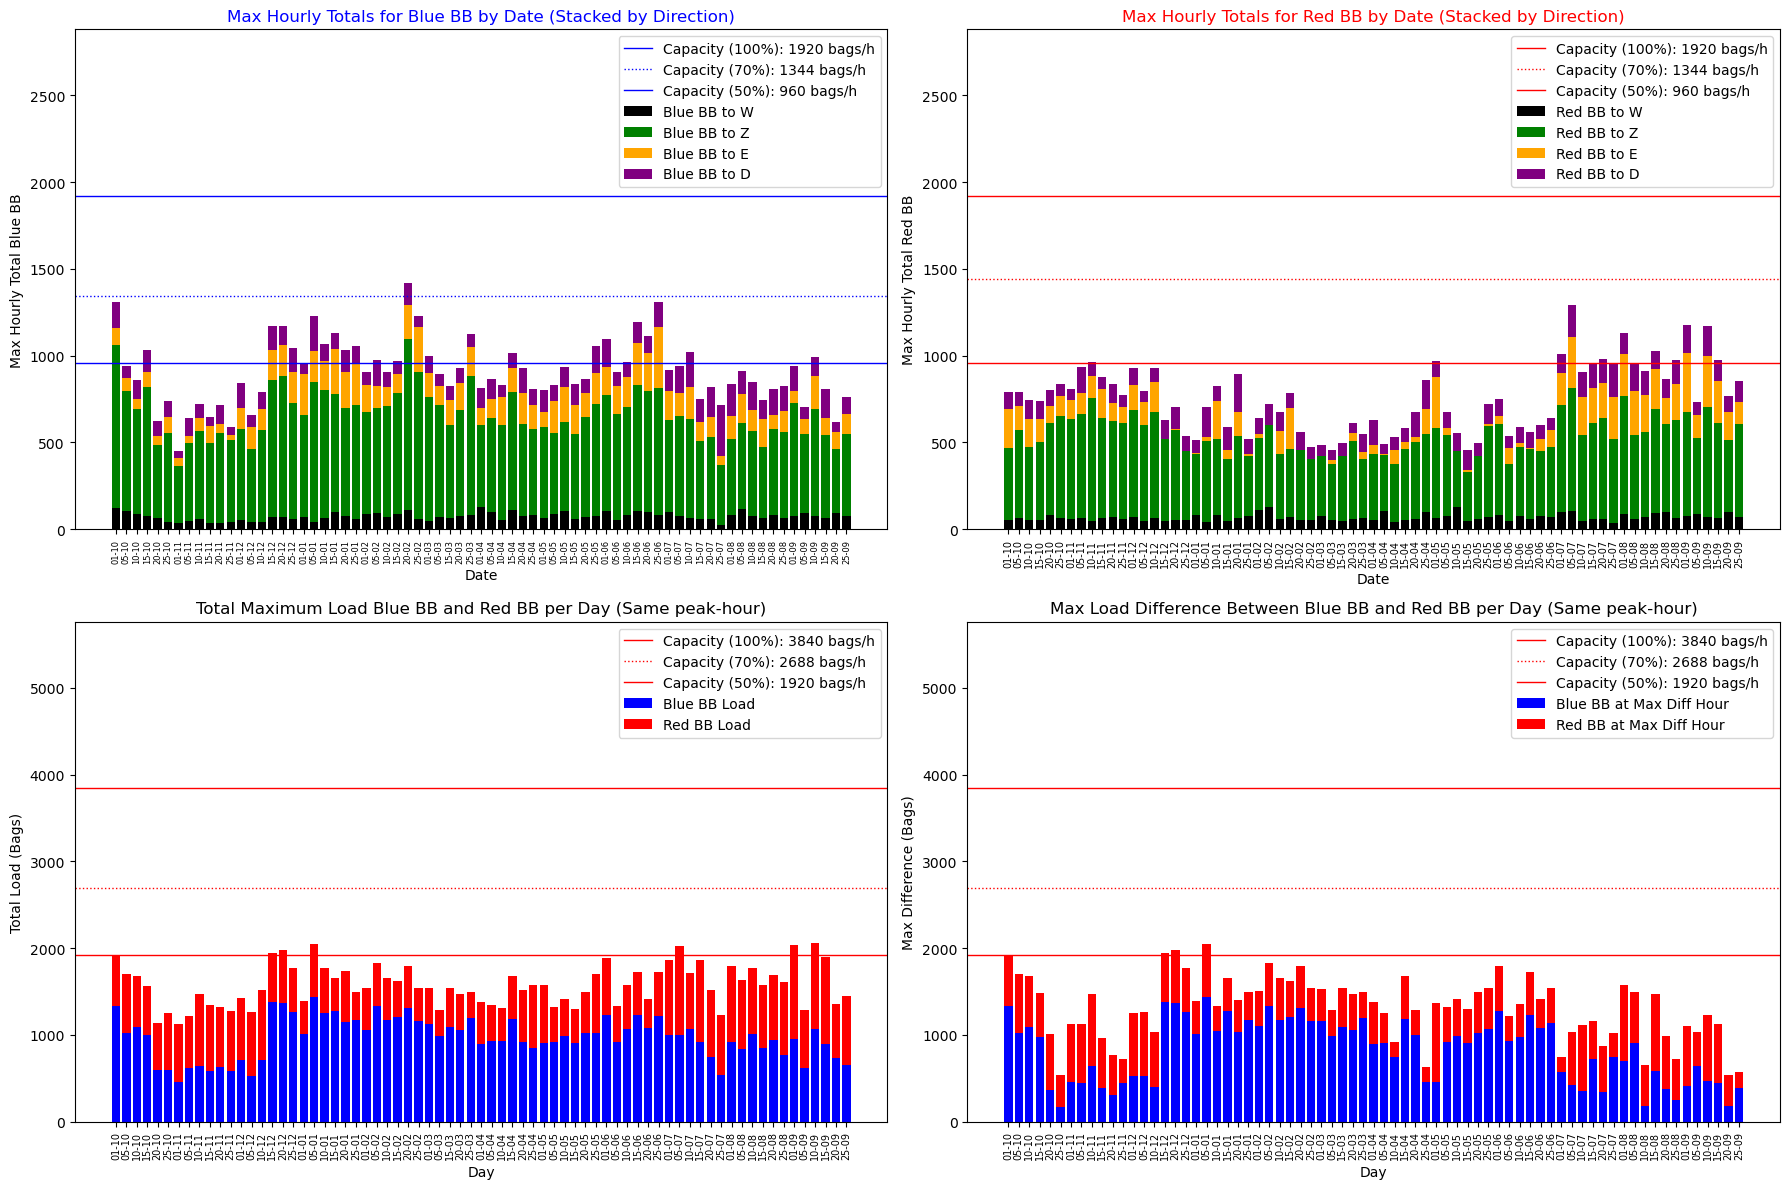

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Correctly assign the file path to the file_path variable
file_path = r"C:\\Users\\miche\\Downloads\\01-06 Load on BB.xlsx"

# Load all sheets from the Excel file
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Define Blue BB and Red BB columns
Blue_BB_columns = [
    'C via BB (10033) to W', 'C via BB (10033) to Z', 'C via BB (10034) to Z',
    'C via BB (10630) to E', 'C via BB (10630) to D', 'C via BB (10630) to W',
    'C via BB (10630) to Z', 'W via BB (10630) to E', 'W via BB (10630) to W',
    'W via BB (10630) to D', 'W via BB (10010) to Z', 'W via BB (10009) to D',
    'W via BB (10009) to Z', 'W via BB (10034) to Z', 'UQE via BB (10630) to D',
    'UQE via BB (10630) to E', 'UQE via BB (10630) to Z', 'UQE via BB (10630) to W',
    'UQE via BB (10033) to W', 'UQE via BB (10033) to Z', 'UQE via BB (10033) to E',
    'UQE via BB (10034) to W', 'UQE via BB (10034) to Z', 'UQE via BB (10009) to D',
    'UQE via BB (10009) to Z', 'Z via BB (10630) to D', 'Z via BB (10630) to E',
    'Z via BB (10630) to W', 'Z via BB (10009) to D', 'T2 via BB (10010) to Z',
    'T2 via BB (10033) to Z', 'T2 via BB (10034) to E', 'T2 via BB (10034) to Z',
    'T2 via BB (10630) to D', 'T2 via BB (10630) to E', 'T2 via BB (10630) to W',
    'TSD via BB (10009) to D', 'TSD via BB (10009) to W', 'TSD via BB (10009) to Z',
    'TSD via BB (10033) to Z', 'TSD via BB (10034) to E', 'TSD via BB (10034) to Z',
    'TSD via BB (10630) to D', 'TSD via BB (10630) to E', 'TSD via BB (10630) to W',
    'TSD via BB (10630) to Z'
]

Red_BB_columns = [
    'W via BB (10640) to E', 'W via BB (10640) to D', 'W via BB (10640) to Z',
    'W via BB (10011) to Z', 'W via BB (10008) to D', 'W via BB (10008) to Z',
    'UQE via BB (10640) to D', 'UQE via BB (10640) to E', 'UQE via BB (10640) to Z',
    'UQE via BB (10008) to D', 'UQE via BB (10008) to Z', 'UQE via BB (10035) to D',
    'UQE via BB (10035) to W', 'UQE via BB (10035) to Z', 'C via BB (10640) to E',
    'UQE via BB (10640) to W', 'C via BB (10008) to Z', 'C via BB (10640) to D', 
    'C via BB (10640) to W',
    'C via BB (10640) to Z', 'Z via BB (10640) to D', 'Z via BB (10640) to E', 
    'Z via BB (10640) to W', 'T2 via BB (10011) to Z', 'T2 via BB (10640) to E',
    'T2 via BB (10008) to Z', 'T2 via BB (10640) to D', 'T2 via BB (10640) to W',
    'TSD via BB (10008) to D', 'TSD via BB (10008) to W', 'TSD via BB (10008) to Z',
    'TSD via BB (10011) to Z', 'TSD via BB (10640) to D', 'TSD via BB (10640) to W',
    'TSD via BB (10640) to Z', 'TSD via BB (10640) to E'
]

# Dictionary to store max hourly totals for Blue BB and Red BB
max_hourly_totals_blue_dict = {}
max_hourly_totals_red_dict = {}

# List to store the total maximum loads and differences for each day
total_max_loads_per_day = []
differences_per_day = []



# Process each sheet in the Excel file
for sheet_name, df in sheets_dict.items():
    # Handle missing columns for Blue BB
    for col in Blue_BB_columns:
        df[col] = df.get(col, 0)  # Fill missing columns with 0

    # Handle missing columns for Red BB
    for col in Red_BB_columns:
        df[col] = df.get(col, 0)  # Fill missing columns with 0

    # Process only the relevant columns for Blue BB and Red BB
    Blue_BB_df = df[Blue_BB_columns].copy()
    Red_BB_df = df[Red_BB_columns].copy()

    # Add 'Hour' column based on index (assuming 15-minute intervals)
    Blue_BB_df['Hour'] = (Blue_BB_df.index // 4) + 1
    Red_BB_df['Hour'] = (Red_BB_df.index // 4) + 1

    # Group by 'Hour' and sum the values in each column
    hourly_sums_blue = Blue_BB_df.groupby('Hour').sum()
    hourly_sums_red = Red_BB_df.groupby('Hour').sum()

    # Calculate total sum across all columns for each hour
    hourly_totals_blue = hourly_sums_blue.sum(axis=1)
    hourly_totals_red = hourly_sums_red.sum(axis=1)

    # Max Hourly Totals for Blue BB and Red BB
    max_hourly_totals_blue_dict[sheet_name] = hourly_totals_blue.max()
    max_hourly_totals_red_dict[sheet_name] = hourly_totals_red.max()

    # Find the maximum combined total load for Blue BB and Red BB
    max_total_hour = (hourly_totals_blue + hourly_totals_red).idxmax()
    total_max_loads_per_day.append({
        'day': sheet_name,
        'max_total_load_blue': hourly_totals_blue.loc[max_total_hour],
        'max_total_load_red': hourly_totals_red.loc[max_total_hour],
        'max_total_hour': max_total_hour
    })

    # Calculate the absolute differences in hourly totals between Blue BB and Red BB
    hourly_total_diff = abs(hourly_totals_blue - hourly_totals_red)

    # Find the maximum difference and the hour at which it occurred
    max_diff = hourly_total_diff.max()
    max_diff_hour = hourly_total_diff.idxmax()

    # Store the differences for the day
    differences_per_day.append({
        'day': sheet_name,
        'max_difference': max_diff,
        'max_diff_hour': max_diff_hour,
        'load_blue_at_diff_hour': hourly_totals_blue.loc[max_diff_hour],
        'load_red_at_diff_hour': hourly_totals_red.loc[max_diff_hour]
    })
# Process each sheet in the Excel file
for sheet_name, df in sheets_dict.items():
    # Handle missing columns for Blue BB
    for col in Blue_BB_columns:
        if col not in df.columns:
            print(f"Column {col} missing in sheet {sheet_name}, filling with zeros.")
        df[col] = df.get(col, 0)  # Fill missing columns with 0

    # Handle missing columns for Red BB
    for col in Red_BB_columns:
        if col not in df.columns:
            print(f"Column {col} missing in sheet {sheet_name}, filling with zeros.")
        df[col] = df.get(col, 0)  # Fill missing columns with 0

    # Process only the relevant columns for Blue BB and Red BB
    Blue_BB_df = df[Blue_BB_columns].copy()
    Red_BB_df = df[Red_BB_columns].copy()

    # Add 'Hour' column based on index (assuming 15-minute intervals)
    Blue_BB_df['Hour'] = (Blue_BB_df.index // 4) + 1
    Red_BB_df['Hour'] = (Red_BB_df.index // 4) + 1

    # Group by 'Hour' and sum the values in each column
    hourly_sums_blue = Blue_BB_df.groupby('Hour').sum()
    hourly_sums_red = Red_BB_df.groupby('Hour').sum()

    # Calculate total sum across all columns for each hour
    hourly_totals_blue = hourly_sums_blue.sum(axis=1)
    hourly_totals_red = hourly_sums_red.sum(axis=1)

    # Max Hourly Totals for Blue BB and Red BB
    max_hourly_totals_blue_dict[sheet_name] = hourly_totals_blue.max()
    max_hourly_totals_red_dict[sheet_name] = hourly_totals_red.max()

    # Find the maximum combined total load for Blue BB and Red BB
    max_total_hour = (hourly_totals_blue + hourly_totals_red).idxmax()
    total_max_loads_per_day.append({
        'day': sheet_name,
        'max_total_load_blue': hourly_totals_blue.loc[max_total_hour],
        'max_total_load_red': hourly_totals_red.loc[max_total_hour],
        'max_total_hour': max_total_hour
    })

    # Calculate the absolute differences in hourly totals between Blue BB and Red BB
    hourly_total_diff = abs(hourly_totals_blue - hourly_totals_red)

    # Find the maximum difference and the hour at which it occurred
    max_diff = hourly_total_diff.max()
    max_diff_hour = hourly_total_diff.idxmax()

    # Store the differences for the day
    differences_per_day.append({
        'day': sheet_name,
        'max_difference': max_diff,
        'max_diff_hour': max_diff_hour,
        'load_blue_at_diff_hour': hourly_totals_blue.loc[max_diff_hour],
        'load_red_at_diff_hour': hourly_totals_red.loc[max_diff_hour]
    })


# Prepare data for plotting
sheet_names_infeed_blue = list(max_hourly_totals_blue_dict.keys())
sheet_names_infeed_red = list(max_hourly_totals_red_dict.keys())
days = [result['day'] for result in total_max_loads_per_day]
blue_loads = [result['max_total_load_blue'] for result in total_max_loads_per_day]
red_loads = [result['max_total_load_red'] for result in total_max_loads_per_day]
max_differences_blue = [result['load_blue_at_diff_hour'] for result in differences_per_day]
max_differences_red = [result['load_red_at_diff_hour'] for result in differences_per_day]


blue_columns_by_direction = {
    'W': ['C via BB (10033) to W', 'C via BB (10630) to W', 'W via BB (10630) to W', 
          'UQE via BB (10630) to W', 'UQE via BB (10033) to W', 'UQE via BB (10034) to W', 
          'Z via BB (10630) to W', 'T2 via BB (10630) to W', 'TSD via BB (10630) to W'],
    
    'Z': ['C via BB (10033) to Z', 'C via BB (10034) to Z', 'C via BB (10630) to Z', 
          'W via BB (10010) to Z', 'W via BB (10009) to Z', 'W via BB (10034) to Z', 
          'UQE via BB (10630) to Z', 'UQE via BB (10033) to Z', 'UQE via BB (10034) to Z', 
          'UQE via BB (10009) to Z', 'T2 via BB (10010) to Z', 'T2 via BB (10033) to Z', 
          'T2 via BB (10034) to Z', 'TSD via BB (10009) to Z', 'TSD via BB (10033) to Z', 
          'TSD via BB (10034) to Z', 'TSD via BB (10630) to Z'],

    'E': ['C via BB (10630) to E', 'W via BB (10630) to E', 'UQE via BB (10630) to E', 
          'T2 via BB (10034) to E', 'T2 via BB (10630) to E', 'TSD via BB (10630) to E'],

    'D': ['C via BB (10630) to D', 'W via BB (10009) to D', 'UQE via BB (10630) to D', 
          'UQE via BB (10009) to D', 'Z via BB (10630) to D', 'T2 via BB (10630) to D', 
          'TSD via BB (10009) to D', 'TSD via BB (10630) to D']
}

red_columns_by_direction = {
    'W': ['C via BB (10640) to W', 'W via BB (10640) to W', 'UQE via BB (10640) to W', 
          'UQE via BB (10035) to W', 'Z via BB (10640) to W', 'T2 via BB (10640) to W', 
          'TSD via BB (10640) to W'],

    'Z': ['C via BB (10008) to Z', 'W via BB (10640) to Z', 'W via BB (10011) to Z', 
          'W via BB (10008) to Z', 'UQE via BB (10640) to Z', 'UQE via BB (10008) to Z', 
          'UQE via BB (10035) to Z', 'T2 via BB (10008) to Z', 'T2 via BB (10011) to Z', 
          'TSD via BB (10008) to Z', 'TSD via BB (10011) to Z', 'TSD via BB (10640) to Z'],

    'E': ['C via BB (10640) to E', 'UQE via BB (10640) to E', 'Z via BB (10640) to E', 
          'T2 via BB (10640) to E', 'TSD via BB (10640) to E'],

    'D': ['C via BB (10640) to D', 'W via BB (10640) to D', 'W via BB (10008) to D', 
          'UQE via BB (10640) to D', 'UQE via BB (10008) to D', 'UQE via BB (10035) to D', 
          'Z via BB (10640) to D', 'T2 via BB (10640) to D', 'TSD via BB (10008) to D', 
          'TSD via BB (10640) to D']
}


direction_colors = {
    'E': 'orange',
    'Z': 'green',
    'D': 'purple',
    'W': 'black'
}


# Define the y-axis multiplier
y_limit_multiplier = 1.5

# Subplot setup with 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# First subplot: Max Hourly Totals for Blue BB by Date (Stacked by Direction)
bottom = None
for direction, columns in blue_columns_by_direction.items():
    sums_for_direction = [sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max() for sheet_name in sheet_names_infeed_blue]
    if bottom is None:
        axs[0, 0].bar(sheet_names_infeed_blue, sums_for_direction, color=direction_colors[direction], label=f'Blue BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 0].bar(sheet_names_infeed_blue, sums_for_direction, bottom=bottom, color=direction_colors[direction], label=f'Blue BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

axs[0, 0].set_ylim(0, 1920 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Max Hourly Total Blue BB')
axs[0, 0].set_title('Max Hourly Totals for Blue BB by Date (Stacked by Direction)', color='b')
axs[0, 0].axhline(y=1920, color='b', linestyle='-', linewidth=1, label='Capacity (100%): 1920 bags/h')
axs[0, 0].axhline(y=1920 * 0.70, color='b', linestyle=':', linewidth=1, label='Capacity (70%): 1344 bags/h')
axs[0, 0].axhline(y=1920 * 0.5, color='b', linestyle='-', linewidth=1, label='Capacity (50%): 960 bags/h')
axs[0, 0].tick_params(axis='x', rotation=90, labelsize=6)
axs[0, 0].legend(loc='upper right')

# Second subplot: Max Hourly Totals for Red BB by Date (Stacked by Direction)
bottom = None
for direction, columns in red_columns_by_direction.items():
    sums_for_direction = [sheets_dict[sheet_name][columns].sum(axis=1).groupby((sheets_dict[sheet_name].index // 4) + 1).sum().max() for sheet_name in sheet_names_infeed_red]
    if bottom is None:
        axs[0, 1].bar(sheet_names_infeed_red, sums_for_direction, color=direction_colors[direction], label=f'Red BB to {direction}')
        bottom = sums_for_direction
    else:
        axs[0, 1].bar(sheet_names_infeed_red, sums_for_direction, bottom=bottom, color=direction_colors[direction], label=f'Red BB to {direction}')
        bottom = [x + y for x, y in zip(bottom, sums_for_direction)]

axs[0, 1].set_ylim(0, 1920 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Max Hourly Total Red BB')
axs[0, 1].set_title('Max Hourly Totals for Red BB by Date (Stacked by Direction)', color='r')
axs[0, 1].axhline(y=1920, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 1920 bags/h')
axs[0, 1].axhline(y=1920 * 0.75, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 1344 bags/h')
axs[0, 1].axhline(y=1920 * 0.5, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 960 bags/h')
axs[0, 1].tick_params(axis='x', rotation=90, labelsize=7)
axs[0, 1].legend(loc='upper right')

# Third subplot: Total Maximum Load (Blue BB and Red BB) per Day
axs[1, 0].bar(days, blue_loads, label='Blue BB Load', color='blue')
axs[1, 0].bar(days, red_loads, bottom=blue_loads, label='Red BB Load', color='red')
axs[1, 0].set_ylim(0, 1920 * 2 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[1, 0].set_xlabel('Day')
axs[1, 0].set_ylabel('Total Load (Bags)')
axs[1, 0].set_title('Total Maximum Load Blue BB and Red BB per Day (Same peak-hour)')
axs[1, 0].axhline(y=1920 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 3840 bags/h')
axs[1, 0].axhline(y=1920 * 0.70 * 2, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 2688 bags/h')
axs[1, 0].axhline(y=1920 * 0.5 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 1920 bags/h')
axs[1, 0].tick_params(axis='x', rotation=90, labelsize=7)
axs[1, 0].legend(loc='upper right')

# Fourth subplot: Stacked Max Load Difference Between Blue BB and Red BB with ratios
axs[1, 1].bar(days, max_differences_blue, label='Blue BB at Max Diff Hour', color='blue')
axs[1, 1].bar(days, max_differences_red, bottom=max_differences_blue, label='Red BB at Max Diff Hour', color='red')
axs[1, 1].set_ylim(0, 1920 * 2 * y_limit_multiplier)  # Apply y_limit_multiplier
axs[1, 1].set_xlabel('Day')
axs[1, 1].set_ylabel('Max Difference (Bags)')
axs[1, 1].set_title('Max Load Difference Between Blue BB and Red BB per Day (Same peak-hour)')
axs[1, 1].axhline(y=1920 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (100%): 3840 bags/h')
axs[1, 1].axhline(y=1920 * 0.70 * 2, color='r', linestyle=':', linewidth=1, label='Capacity (70%): 2688 bags/h')
axs[1, 1].axhline(y=1920 * 0.5 * 2, color='r', linestyle='-', linewidth=1, label='Capacity (50%): 1920 bags/h')
axs[1, 1].tick_params(axis='x', rotation=90, labelsize=7)
axs[1, 1].legend(loc='upper right')

# Adjust layout for clarity
plt.tight_layout()

# Show plot
output_path = f"C:\\Users\\miche\\Downloads\\Total infeed figure.png"  # Update the path as needed
plt.savefig(output_path, format='png', dpi=300)  # Save as PNG with high resolution
plt.show()
